## Przewidywanie ceny domów.

### Projekt zaliczeniowy
#### Małgorzata Skuta

Link do danych: web.stanford.edu/class/stats191/data/ames2000_NAfix.csv

Dokładny opis danych: http://web.stanford.edu/class/stats191/data/amesdoc.txt

Zmienna celu (cena domu): SalePrice

In [1]:
#wczytanie potrzebnych bibliotek

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn import  metrics

#ignorowanie warningów
import warnings
warnings.filterwarnings('ignore')

In [2]:
#wczytanie danych

data = pd.read_csv('ames2000_NAfix.csv', sep = ",")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 80 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   MS.SubClass      2000 non-null   int64 
 1   MS.Zoning        2000 non-null   object
 2   Lot.Frontage     2000 non-null   object
 3   Lot.Area         2000 non-null   int64 
 4   Street           2000 non-null   object
 5   Alley            2000 non-null   object
 6   Lot.Shape        2000 non-null   object
 7   Land.Contour     2000 non-null   object
 8   Utilities        2000 non-null   object
 9   Lot.Config       2000 non-null   object
 10  Land.Slope       2000 non-null   object
 11  Neighborhood     2000 non-null   object
 12  Condition.1      2000 non-null   object
 13  Condition.2      2000 non-null   object
 14  Bldg.Type        2000 non-null   object
 15  House.Style      2000 non-null   object
 16  Overall.Qual     2000 non-null   int64 
 17  Overall.Cond     2000 non-null   

In [4]:
pd.set_option('display.max_columns', None)
data.head()

,MS.SubClass,MS.Zoning,Lot.Frontage,Lot.Area,Street,Alley,Lot.Shape,Land.Contour,Utilities,Lot.Config,Land.Slope,Neighborhood,Condition.1,Condition.2,Bldg.Type,House.Style,Overall.Qual,Overall.Cond,Year.Built,Year.Remod.Add,Roof.Style,Roof.Matl,Exterior.1st,Exterior.2nd,Mas.Vnr.Type,Mas.Vnr.Area,Exter.Qual,Exter.Cond,Foundation,Bsmt.Qual,Bsmt.Cond,Bsmt.Exposure,BsmtFin.Type.1,BsmtFin.SF.1,BsmtFin.Type.2,BsmtFin.SF.2,Bsmt.Unf.SF,Total.Bsmt.SF,Heating,Heating.QC,Central.Air,Electrical,X1st.Flr.SF,X2nd.Flr.SF,Low.Qual.Fin.SF,Gr.Liv.Area,Bsmt.Full.Bath,Bsmt.Half.Bath,Full.Bath,Half.Bath,Bedroom.AbvGr,Kitchen.AbvGr,Kitchen.Qual,TotRms.AbvGrd,Functional,Fireplaces,Fireplace.Qu,Garage.Type,Garage.Yr.Blt,Garage.Finish,Garage.Cars,Garage.Area,Garage.Qual,Garage.Cond,Paved.Drive,Wood.Deck.SF,Open.Porch.SF,Enclosed.Porch,X3Ssn.Porch,Screen.Porch,Pool.Area,Pool.QC,Fence,Misc.Feature,Misc.Val,Mo.Sold,Yr.Sold,Sale.Type,Sale.Condition,SalePrice
0,120,RL,34,3901,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,Twnhs,1Story,6,5,2005,2006,Gable,CompShg,VinylSd,VinylSd,Stone,182,Gd,TA,PConc,Gd,TA,Av,ALQ,866,Unf,0,436,1302,GasA,Ex,Y,SBrkr,1302,0,0,1302,1,0,1,1,1,1,Gd,5,Typ,1,Gd,Attchd,2005,RFn,2,631,TA,TA,Y,110,50,0,0,0,0,None,None,None,0,8,2007,New,Partial,204000
1,20,RL,70,8400,Pave,None,Reg,Lvl,AllPub,Corner,Gtl,Nonemes,Norm,Norm,1Fam,1Story,4,5,1970,1970,Gable,CompShg,Plywood,Plywood,None,0,TA,TA,CBlock,TA,TA,No,ALQ,804,Rec,78,0,882,GasA,TA,Y,SBrkr,882,0,0,882,1,0,1,0,2,1,TA,4,Typ,0,None,Attchd,1970,Fin,2,525,TA,TA,Y,240,0,0,0,0,0,None,MnPrv,None,0,4,2010,WD,Normal,126000
2,85,RL,60,7200,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,SFoyer,5,8,1972,2003,Gable,CompShg,WdShing,HdBoard,None,0,TA,Gd,CBlock,Gd,TA,Av,GLQ,660,Unf,0,108,768,GasA,Gd,Y,SBrkr,768,0,0,768,0,1,1,0,2,1,TA,5,Typ,0,None,Detchd,1974,Fin,1,396,TA,TA,Y,192,0,0,0,0,0,None,MnPrv,None,0,4,2009,WD,Normal,133900
3,90,RL,64,7018,Pave,None,Reg,Bnk,AllPub,Inside,Gtl,SawyerW,Norm,Norm,Duplex,1Story,5,5,1979,1979,Gable,CompShg,Plywood,Plywood,None,0,TA,TA,Slab,None,None,None,None,0,None,0,0,0,GasA,TA,Y,SBrkr,1535,0,0,1535,0,0,2,0,4,2,TA,8,Typ,0,None,Attchd,1979,Unf,2,400,TA,TA,Y,0,0,0,0,0,0,None,None,None,0,6,2009,WD,Alloca,118858
4,60,RL,111,16259,Pave,None,Reg,Lvl,AllPub,Corner,Gtl,NridgHt,Norm,Norm,1Fam,2Story,9,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,Stone,370,TA,TA,PConc,Ex,Gd,Av,Unf,0,Unf,0,1249,1249,GasA,Ex,Y,SBrkr,1249,1347,0,2596,0,0,3,1,4,1,Gd,9,Typ,0,None,Attchd,2006,RFn,3,840,TA,TA,Y,240,154,0,0,0,0,None,None,None,0,9,2006,New,Partial,342643


## Zmienne objaśniające

### Braki danych

In [5]:
#sprawdzenie w jakich polach występują braki
nulls = data.isna().sum()
nulls = nulls.drop(nulls[nulls == 0].index)
nulls

Mas.Vnr.Type      16
Bsmt.Qual          1
Bsmt.Cond          1
Bsmt.Exposure      3
BsmtFin.Type.1     1
BsmtFin.Type.2     2
Garage.Finish      2
Garage.Qual        1
Garage.Cond        1
dtype: int64

In [6]:
16/len(data) *100 
                    
# 0,8% pustych wartości przy zmiennej Mas.Vnr.Type - to na tyle mało, że uzupełnię zmienne najczęściej występującą wartością
# (dla pozostałych zmiennych braków danych jest jeszcze mniej więc zrobię to samo)

0.8

In [7]:
data['Mas.Vnr.Type'].value_counts()

None       1216
BrkFace     593
Stone       159
BrkCmn       15
CBlock        1
Name: Mas.Vnr.Type, dtype: int64

In [8]:
data['Mas.Vnr.Type'] = data['Mas.Vnr.Type'].fillna('None')

In [9]:
data['Bsmt.Qual'].value_counts()

TA      892
Gd      837
Ex      163
Fa       54
None     52
Po        1
Name: Bsmt.Qual, dtype: int64

In [10]:
data['Bsmt.Qual'] = data['Bsmt.Qual'].fillna('TA')

In [11]:
data['Bsmt.Cond'].value_counts()

TA      1783
Gd        88
Fa        71
None      52
Ex         3
Po         2
Name: Bsmt.Cond, dtype: int64

In [12]:
data['Bsmt.Cond'] = data['Bsmt.Cond'].fillna('TA')

In [13]:
data['Bsmt.Exposure'].value_counts()

No      1306
Av       285
Gd       188
Mn       166
None      52
Name: Bsmt.Exposure, dtype: int64

In [14]:
data['Bsmt.Exposure'] = data['Bsmt.Exposure'].fillna('No')

In [15]:
data['BsmtFin.Type.1'].value_counts()

GLQ     584
Unf     565
ALQ     293
Rec     204
BLQ     195
LwQ     106
None     52
Name: BsmtFin.Type.1, dtype: int64

In [16]:
data['BsmtFin.Type.1'] = data['BsmtFin.Type.1'].fillna('GLQ')

In [17]:
data['BsmtFin.Type.2'].value_counts()

Unf     1694
Rec       70
LwQ       67
None      52
BLQ       50
ALQ       38
GLQ       27
Name: BsmtFin.Type.2, dtype: int64

In [18]:
data['BsmtFin.Type.2'] = data['BsmtFin.Type.2'].fillna('Unf')

In [19]:
data['Garage.Finish'].value_counts()

Unf     831
RFn     578
Fin     479
None    110
Name: Garage.Finish, dtype: int64

In [20]:
data['Garage.Finish'] = data['Garage.Finish'].fillna('Unf')

In [21]:
data['Garage.Qual'].value_counts()

TA      1785
None     111
Fa        84
Gd        16
Po         2
Ex         1
Name: Garage.Qual, dtype: int64

In [22]:
data['Garage.Qual'] = data['Garage.Qual'].fillna('TA')

In [23]:
data['Garage.Cond'].value_counts()

TA      1816
None     111
Fa        53
Gd         9
Po         8
Ex         2
Name: Garage.Cond, dtype: int64

In [24]:
data['Garage.Cond'] = data['Garage.Cond'].fillna('TA')

In [25]:
#sprawdzenie czy zostały jeszcze jakieś puste wartości
nulls = data.isna().sum()
nulls = nulls.drop(nulls[nulls == 0].index)
nulls

Series([], dtype: int64)

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 80 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   MS.SubClass      2000 non-null   int64 
 1   MS.Zoning        2000 non-null   object
 2   Lot.Frontage     2000 non-null   object
 3   Lot.Area         2000 non-null   int64 
 4   Street           2000 non-null   object
 5   Alley            2000 non-null   object
 6   Lot.Shape        2000 non-null   object
 7   Land.Contour     2000 non-null   object
 8   Utilities        2000 non-null   object
 9   Lot.Config       2000 non-null   object
 10  Land.Slope       2000 non-null   object
 11  Neighborhood     2000 non-null   object
 12  Condition.1      2000 non-null   object
 13  Condition.2      2000 non-null   object
 14  Bldg.Type        2000 non-null   object
 15  House.Style      2000 non-null   object
 16  Overall.Qual     2000 non-null   int64 
 17  Overall.Cond     2000 non-null   

### Zamienne typu int 

In [27]:
#sprawdzenie które zmienne są typu int
data_int = data.select_dtypes(include=['int64']).columns
data_int

Index(['MS.SubClass', 'Lot.Area', 'Overall.Qual', 'Overall.Cond', 'Year.Built',
       'Year.Remod.Add', 'X1st.Flr.SF', 'X2nd.Flr.SF', 'Low.Qual.Fin.SF',
       'Gr.Liv.Area', 'Full.Bath', 'Half.Bath', 'Bedroom.AbvGr',
       'Kitchen.AbvGr', 'TotRms.AbvGrd', 'Fireplaces', 'Wood.Deck.SF',
       'Open.Porch.SF', 'Enclosed.Porch', 'X3Ssn.Porch', 'Screen.Porch',
       'Pool.Area', 'Misc.Val', 'Mo.Sold', 'Yr.Sold', 'SalePrice'],
      dtype='object')

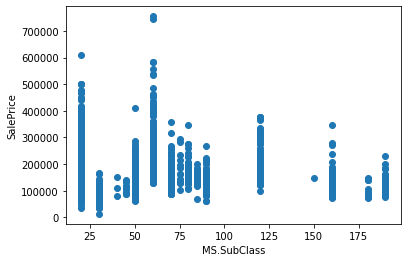

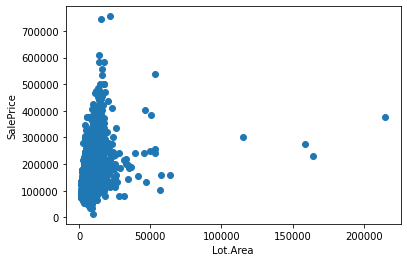

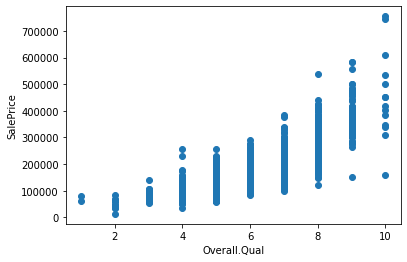

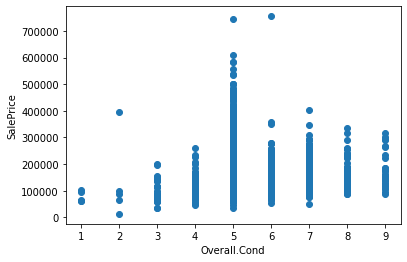

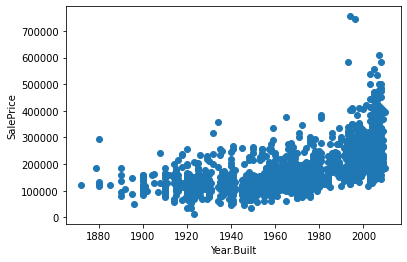

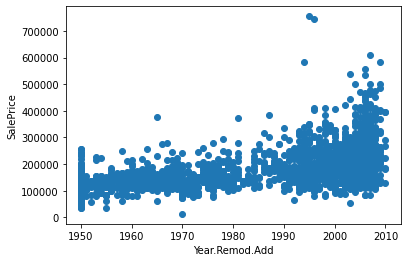

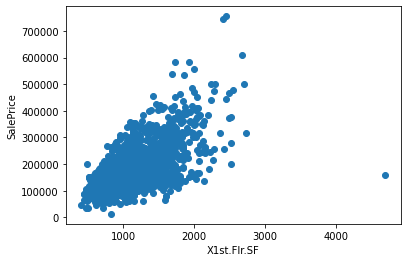

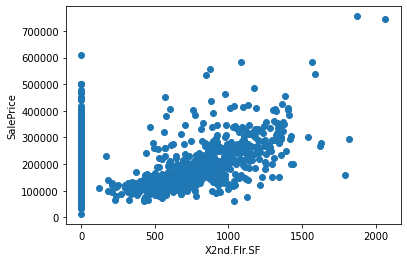

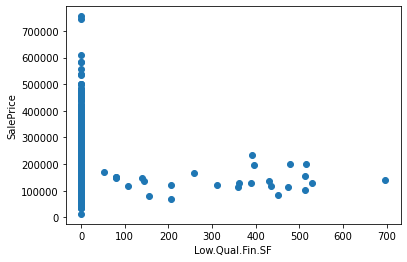

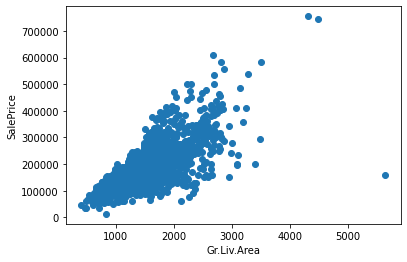

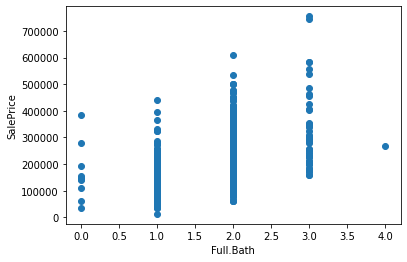

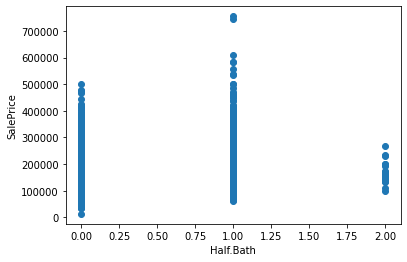

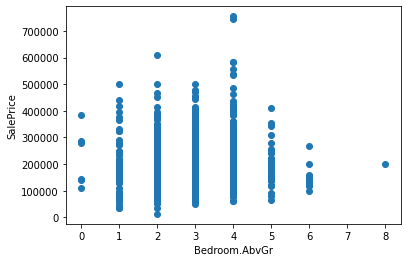

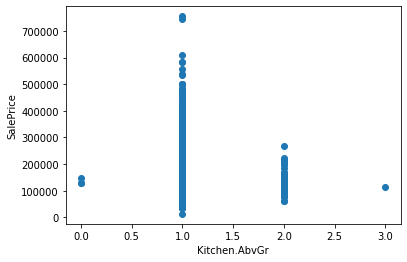

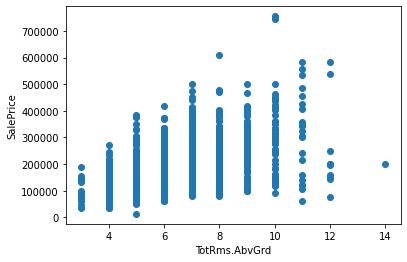

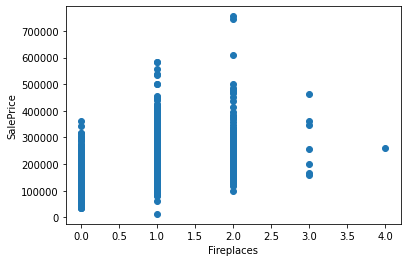

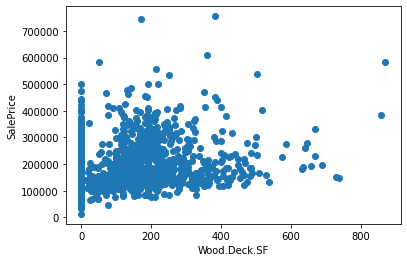

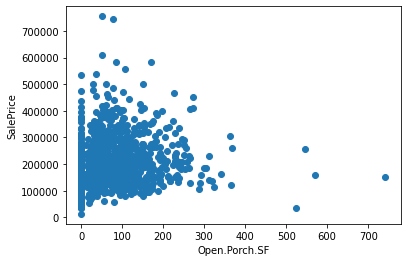

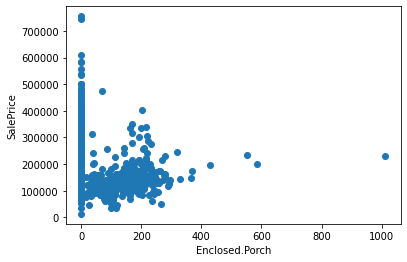

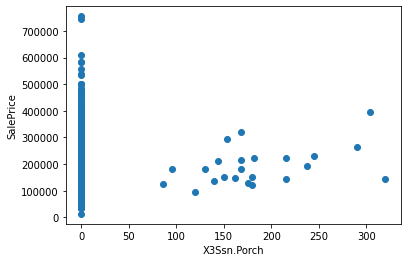

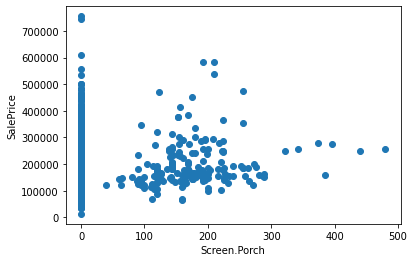

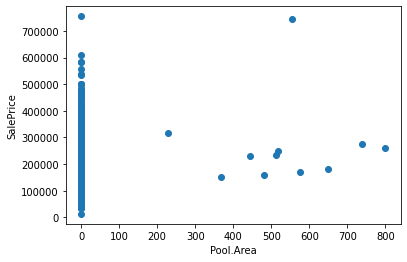

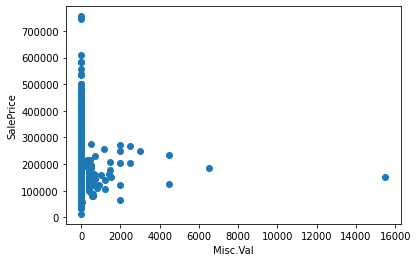

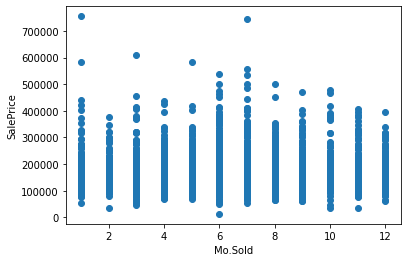

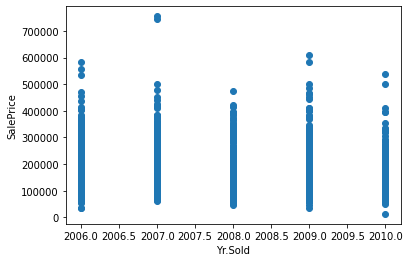

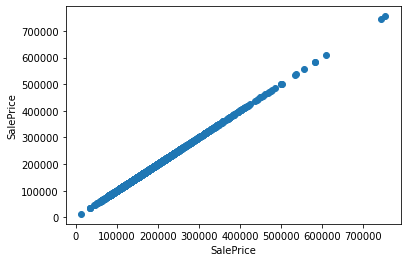

In [28]:
#sprawdzenie jak cena uklada sie wzgledem poszczegolnych zmiennych
for feature in data_int:
    plt.scatter(x = data[feature],
               y = data['SalePrice'])
    plt.ylabel('SalePrice')
    plt.xlabel(feature)
    plt.show()

In [29]:
#zmienna SalePrice ma 2 wartości odstające >600000- zamienię te 2 wartości na trzecią maksymalną
data[data['SalePrice'] > 600000]['SalePrice']

580     755000
663     610000
1541    745000
Name: SalePrice, dtype: int64

In [30]:
#zamiana najmniejszej wartości zmiennej SalePrice na 610000
data.loc[data['SalePrice'] >610000, 'SalePrice'] = 610000

In [31]:
#wszystkie wartości outlierów zamienię na 2 lub trzecią maksymalną (w zależności od zmiennej)

In [32]:
data[data['Lot.Area'] > 60000]['Lot.Area']

140     164660
1082    215245
1233     63887
1262    159000
1550    115149
Name: Lot.Area, dtype: int64

In [33]:
data.loc[data['Lot.Area'] > 63887, 'Lot.Area'] = 63887

In [34]:
data[data['X1st.Flr.SF'] > 2700]['X1st.Flr.SF']

864     2726
1233    4692
Name: X1st.Flr.SF, dtype: int64

In [35]:
data.loc[data['X1st.Flr.SF'] > 2726, 'X1st.Flr.SF'] = 2726

In [36]:
data[data['Low.Qual.Fin.SF'] > 500]['Low.Qual.Fin.SF']

97      514
743     697
868     528
1074    515
1416    512
Name: Low.Qual.Fin.SF, dtype: int64

In [37]:
data.loc[data['Low.Qual.Fin.SF'] > 528, 'Low.Qual.Fin.SF'] = 528

In [38]:
data[data['Gr.Liv.Area'] > 3500]['Gr.Liv.Area']

580     4316
1233    5642
1541    4476
Name: Gr.Liv.Area, dtype: int64

In [39]:
data.loc[data['Gr.Liv.Area'] > 3500, 'Gr.Liv.Area'] = 3500

In [40]:
data[data['Wood.Deck.SF'] > 700]['Wood.Deck.SF']

211     870
270     728
1470    857
1821    736
Name: Wood.Deck.SF, dtype: int64

In [41]:
data.loc[data['Wood.Deck.SF'] > 736, 'Wood.Deck.SF'] = 736

In [42]:
data[data['Open.Porch.SF'] > 500]['Open.Porch.SF']

497     570
576     547
1670    742
1718    523
Name: Open.Porch.SF, dtype: int64

In [43]:
data.loc[data['Open.Porch.SF'] > 570, 'Open.Porch.SF'] = 570

In [44]:
data[data['Enclosed.Porch'] > 500]['Enclosed.Porch']

47      552
222    1012
785     584
Name: Enclosed.Porch, dtype: int64

In [45]:
data.loc[data['Enclosed.Porch'] > 584, 'Enclosed.Porch'] = 584

In [46]:
data[data['Misc.Val'] > 6000]['Misc.Val']

311     15500
1770     6500
Name: Misc.Val, dtype: int64

In [47]:
data.loc[data['Misc.Val'] > 6500, 'Misc.Val'] = 6500

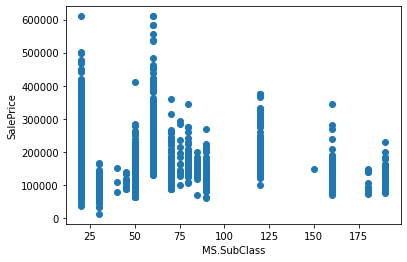

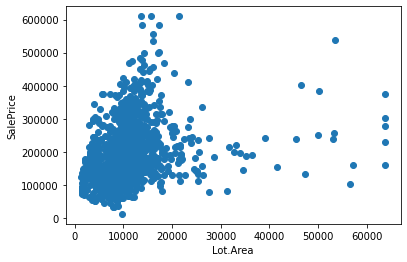

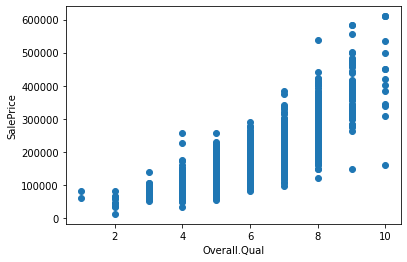

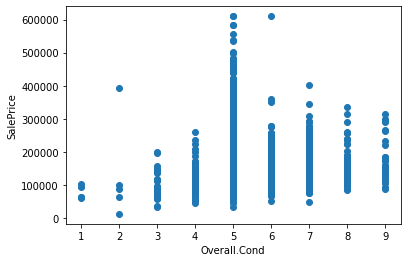

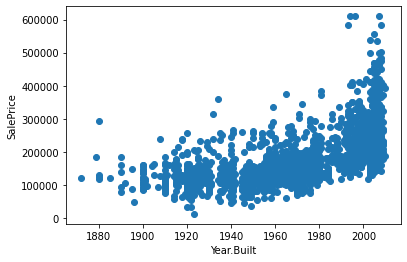

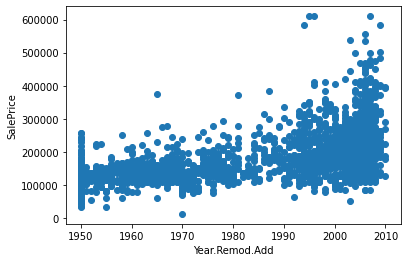

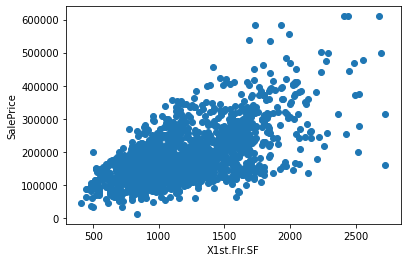

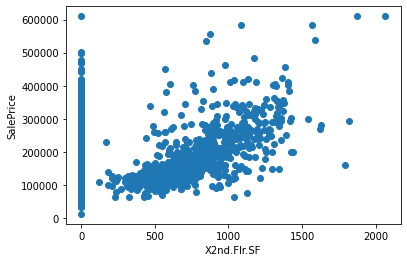

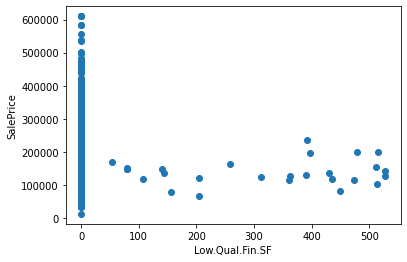

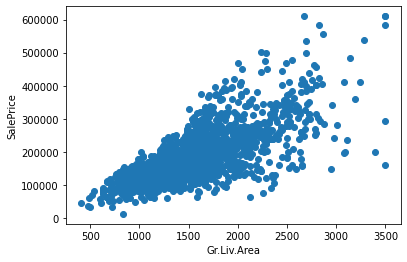

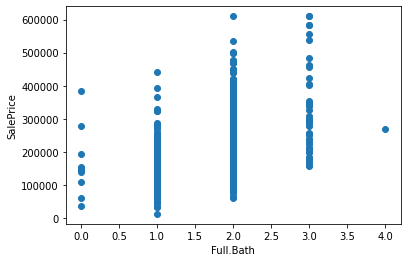

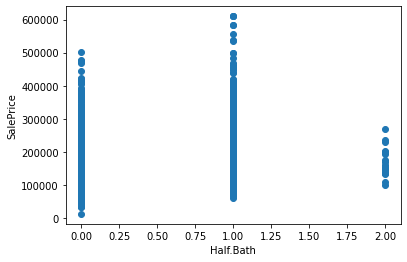

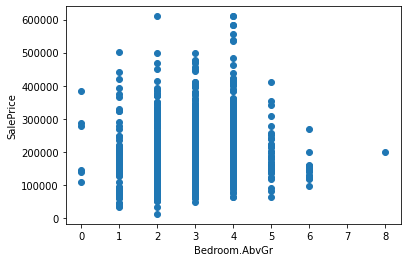

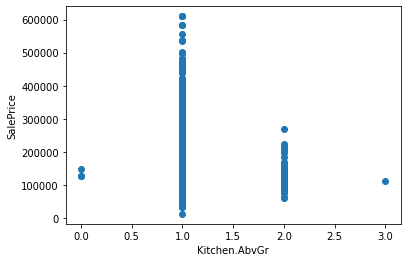

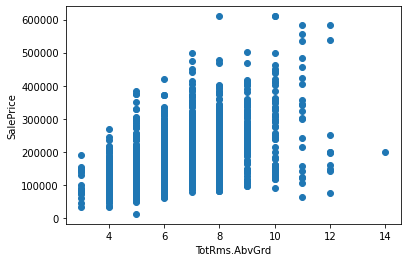

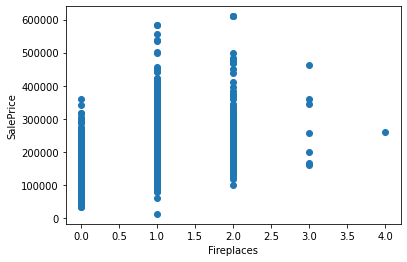

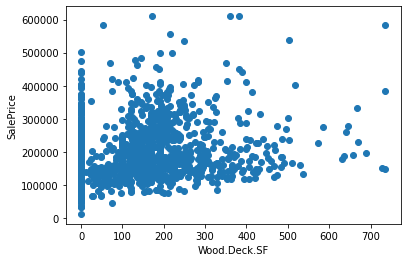

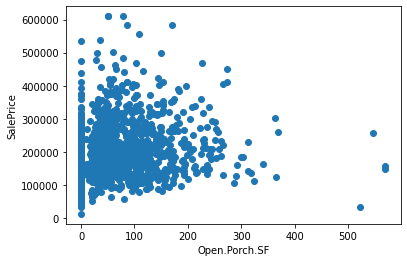

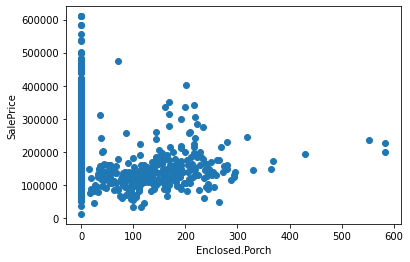

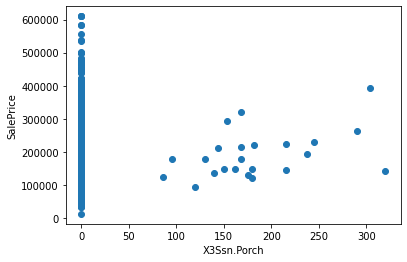

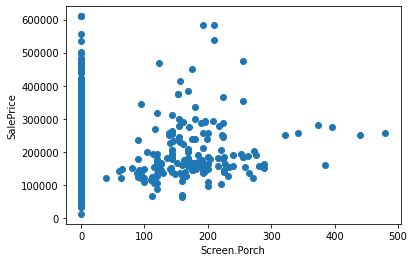

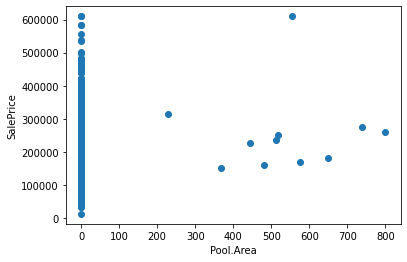

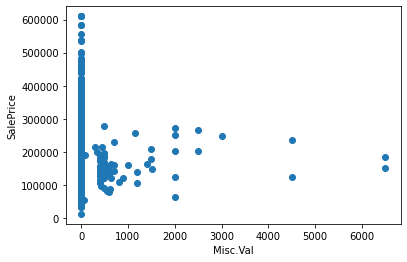

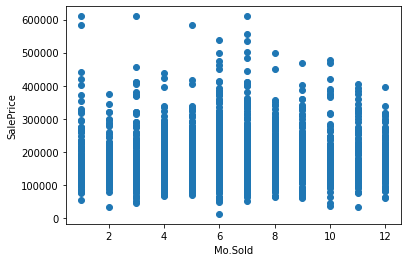

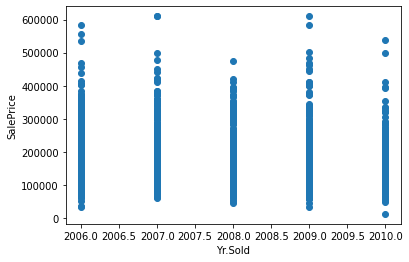

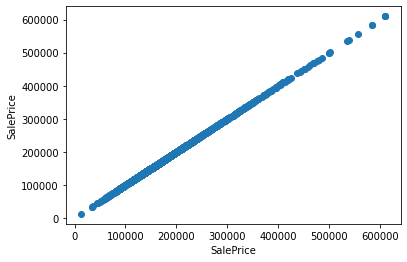

In [48]:
# sprwdzenie jak wykresy rozrzutu wyglądają po zmianach
for feature in data_int:
    plt.scatter(x = data[feature],
               y = data['SalePrice'])
    plt.ylabel('SalePrice')
    plt.xlabel(feature)
    plt.show()

#### Zmienne zawierające rok

In [49]:
# Zamienię je na zmienne, zawierające lata które minęły do momentu sprzedaży
# Year.Built - wiek budynku na moment sprzedaży
# Year.Remod.Add - ile lat minęło od ostatniego remontu (jeśli nie było remontu = wiek budynku) do roku sprzedaży
# Garage.Yr.Blt - wiek garażu na moment sprzedaży
# Yr.Sold - zostaje, bo dobrze wiedzieć w którym roku dom został sprzedany

In [50]:
def lata(zmienna):
    data[zmienna] = data['Yr.Sold'] - data[zmienna]
    plt.hist(x = data[zmienna])
    plt.xlabel(zmienna)
    plt.show()

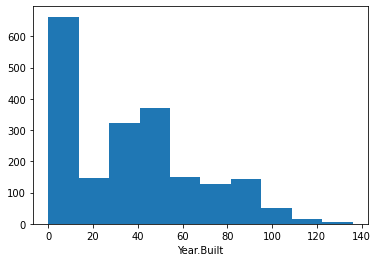

In [51]:
lata('Year.Built')

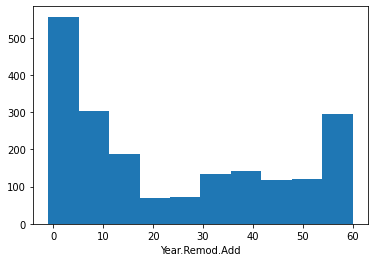

In [52]:
lata('Year.Remod.Add')

In [53]:
#zmienna Garage.Yr.Blt ma wiele wartości 'None' - zamienię te wartości na Yr.Sold.
# w konsewencji funkcja lata dla tych przypadków zwróci zero 
data['Garage.Yr.Blt'].value_counts()

None    112
2005     98
2006     79
2007     75
2004     66
       ... 
1923      1
1914      1
1943      1
1908      1
1917      1
Name: Garage.Yr.Blt, Length: 101, dtype: int64

In [54]:
data.loc[data['Garage.Yr.Blt'] == 'None', 'Garage.Yr.Blt'] = data['Yr.Sold']
data['Garage.Yr.Blt'] = data['Garage.Yr.Blt'].astype(int)

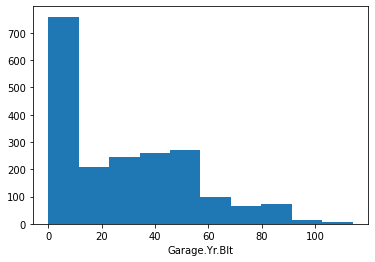

In [55]:
lata('Garage.Yr.Blt')

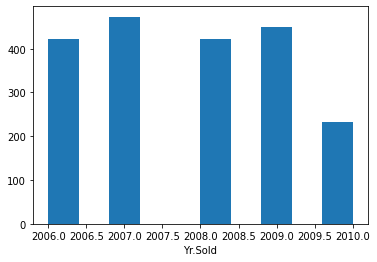

In [56]:
plt.hist(x = data['Yr.Sold'], bins = 10)
plt.xlabel('Yr.Sold')
plt.show()

In [57]:
#zmienna Yr.Sold nie może być intem - rok to zmienna dyskretna, a nie ciągła
data['Yr.Sold'] = data['Yr.Sold'].astype('object')

### Zamienne typu object

In [58]:
data_obj = data.select_dtypes(include=['object']).columns
data_obj

Index(['MS.Zoning', 'Lot.Frontage', 'Street', 'Alley', 'Lot.Shape',
       'Land.Contour', 'Utilities', 'Lot.Config', 'Land.Slope', 'Neighborhood',
       'Condition.1', 'Condition.2', 'Bldg.Type', 'House.Style', 'Roof.Style',
       'Roof.Matl', 'Exterior.1st', 'Exterior.2nd', 'Mas.Vnr.Type',
       'Mas.Vnr.Area', 'Exter.Qual', 'Exter.Cond', 'Foundation', 'Bsmt.Qual',
       'Bsmt.Cond', 'Bsmt.Exposure', 'BsmtFin.Type.1', 'BsmtFin.SF.1',
       'BsmtFin.Type.2', 'BsmtFin.SF.2', 'Bsmt.Unf.SF', 'Total.Bsmt.SF',
       'Heating', 'Heating.QC', 'Central.Air', 'Electrical', 'Bsmt.Full.Bath',
       'Bsmt.Half.Bath', 'Kitchen.Qual', 'Functional', 'Fireplace.Qu',
       'Garage.Type', 'Garage.Finish', 'Garage.Cars', 'Garage.Area',
       'Garage.Qual', 'Garage.Cond', 'Paved.Drive', 'Pool.QC', 'Fence',
       'Misc.Feature', 'Yr.Sold', 'Sale.Type', 'Sale.Condition'],
      dtype='object')

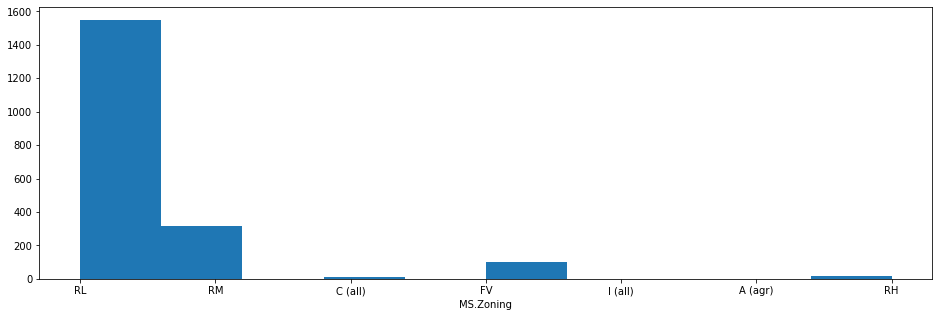

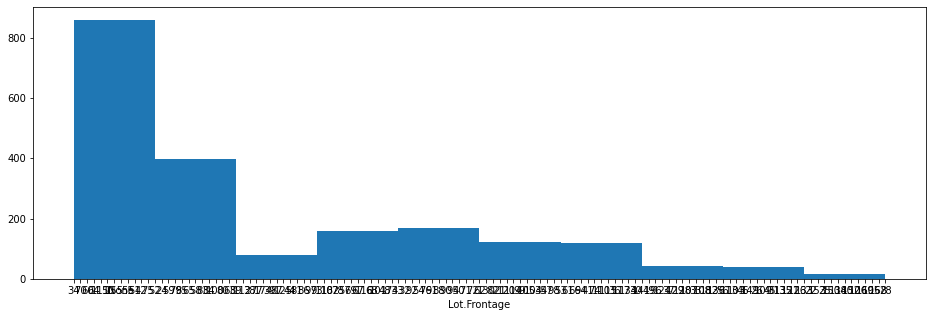

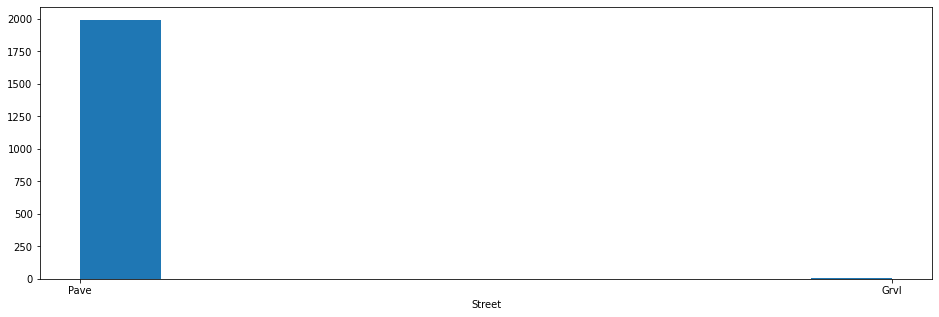

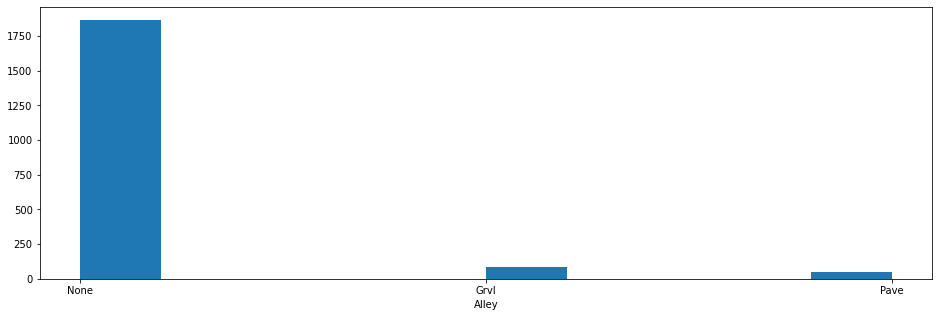

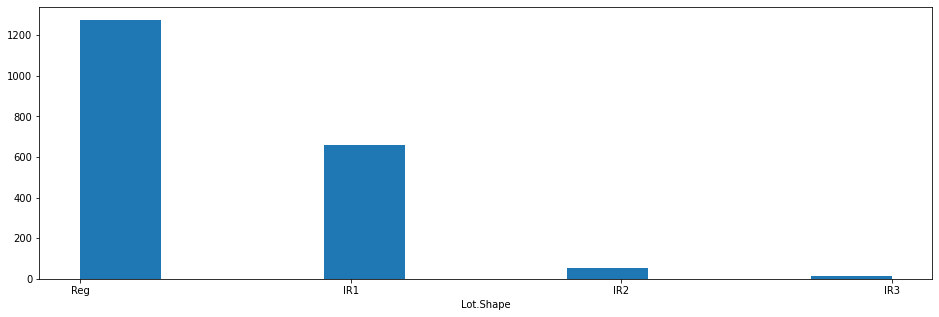

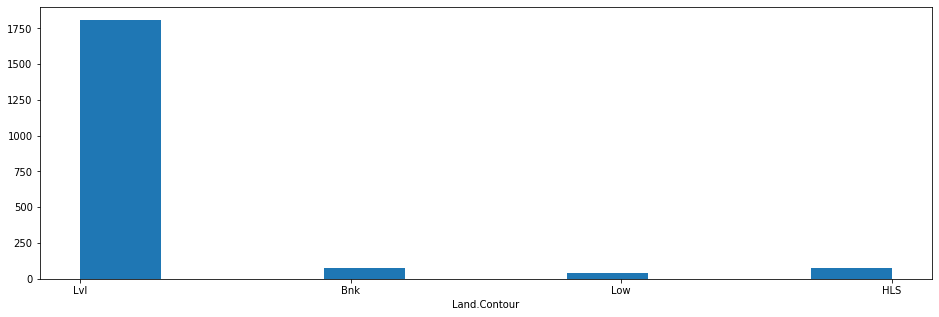

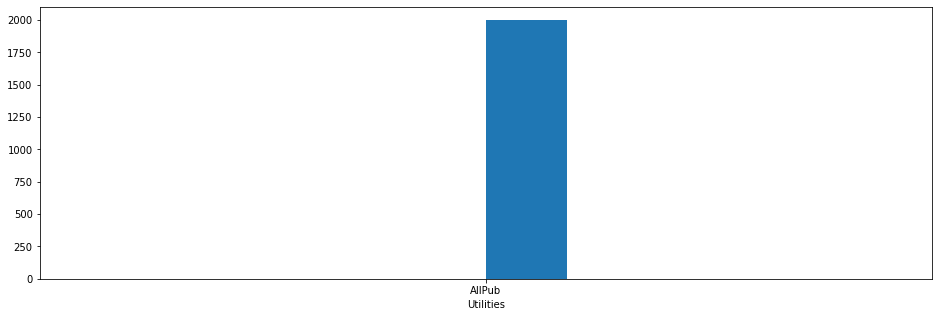

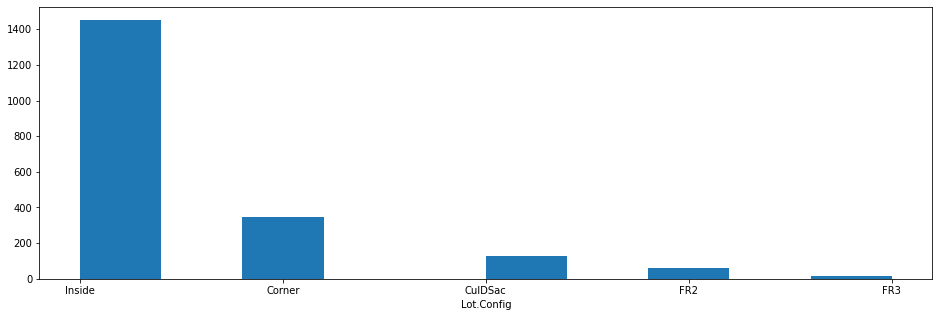

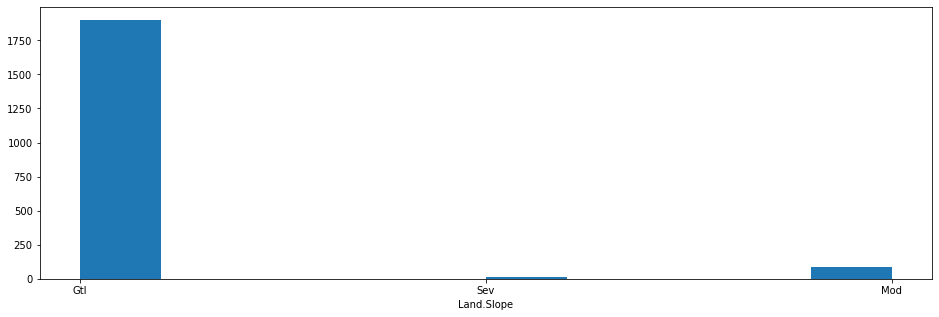

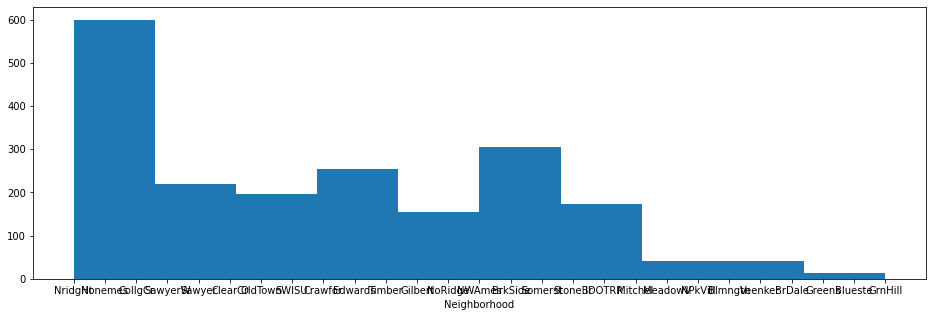

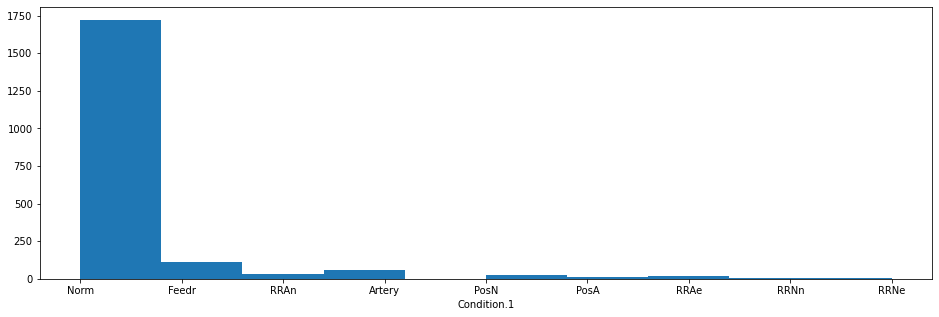

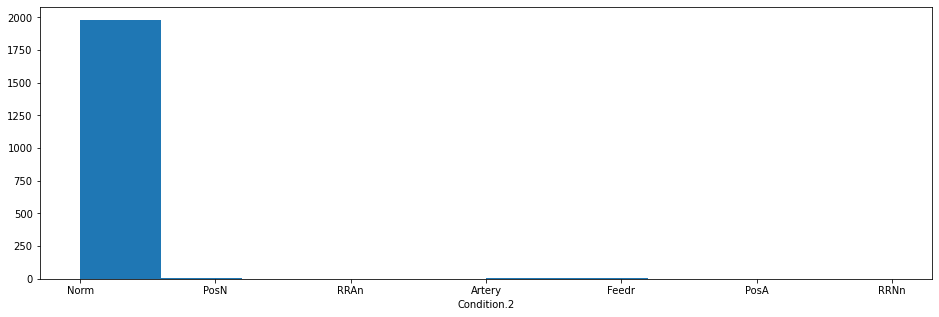

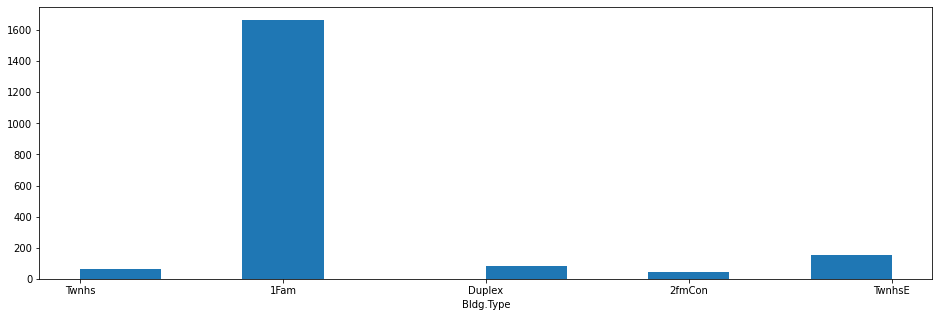

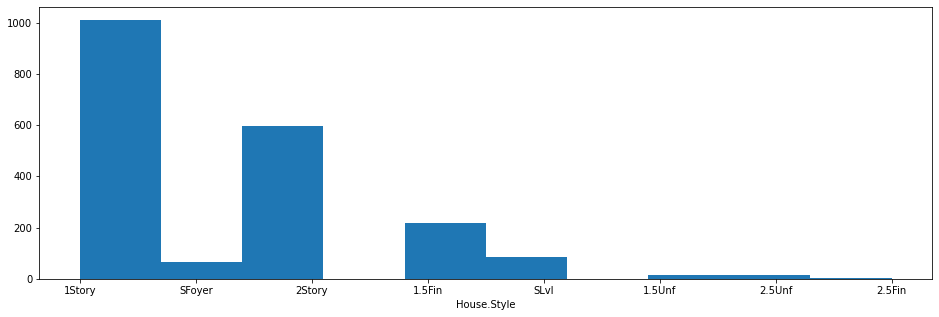

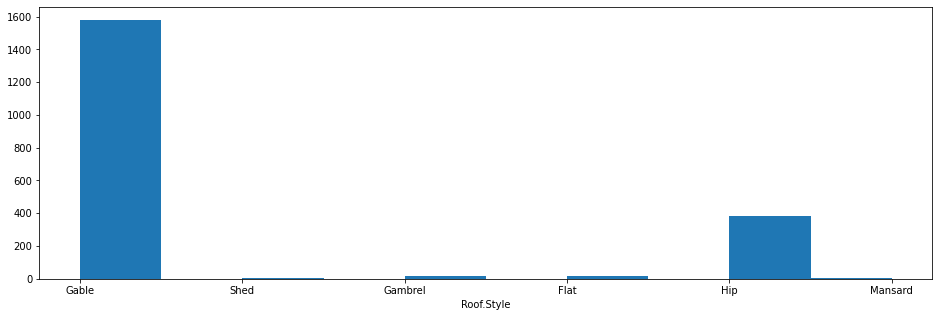

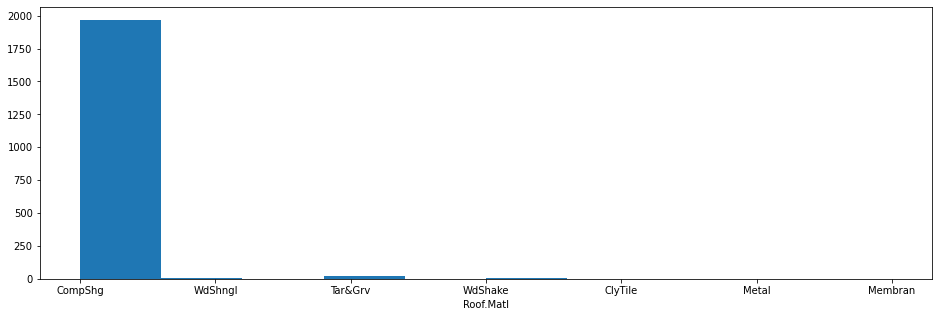

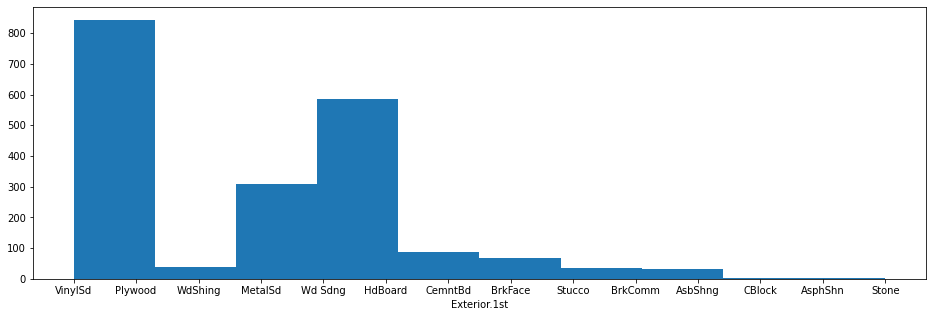

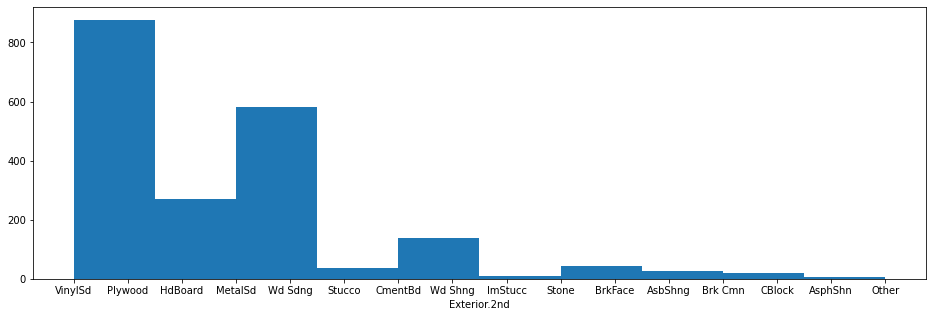

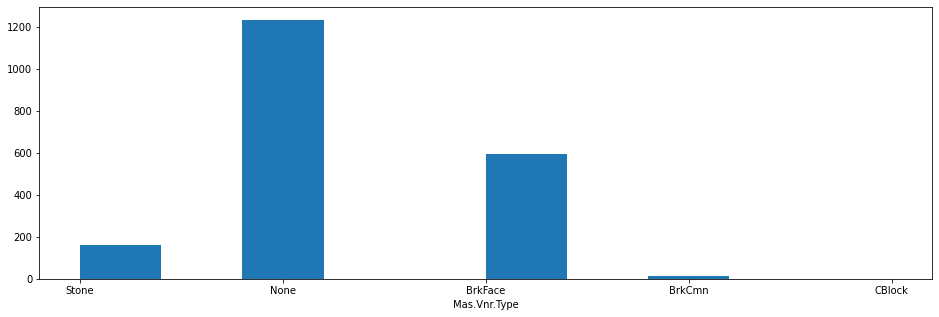

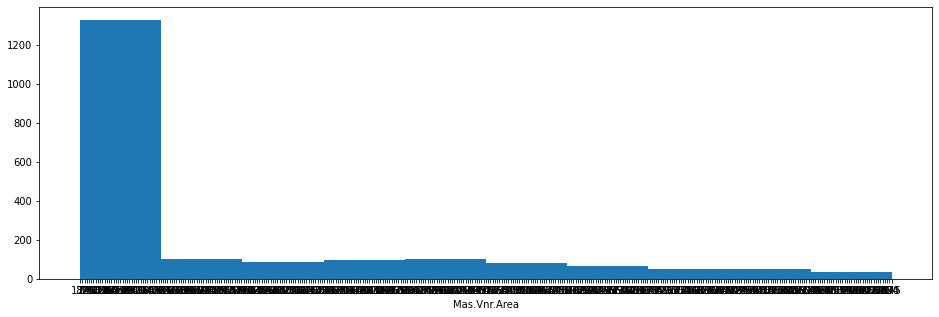

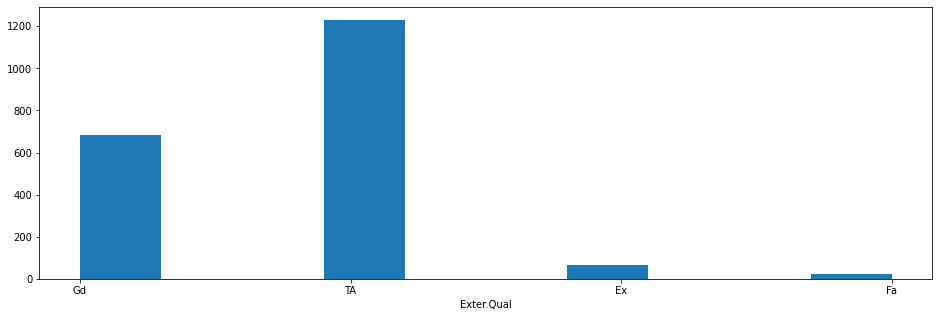

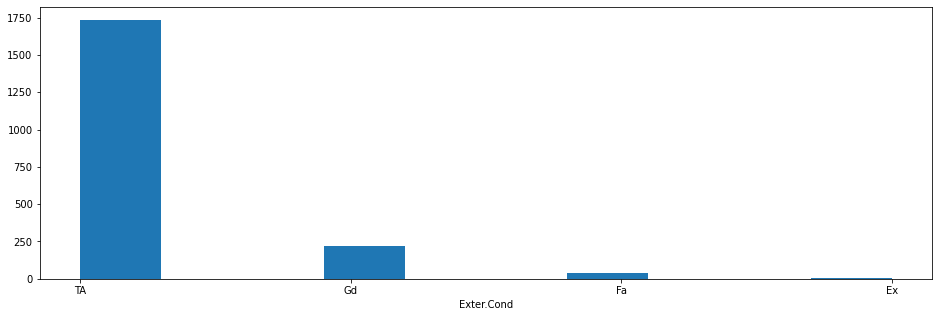

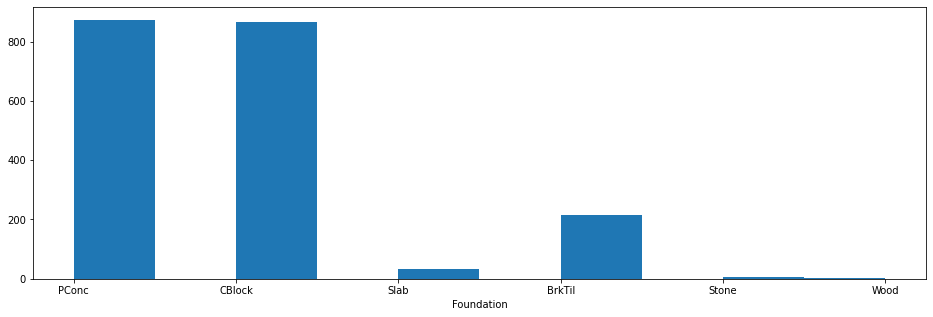

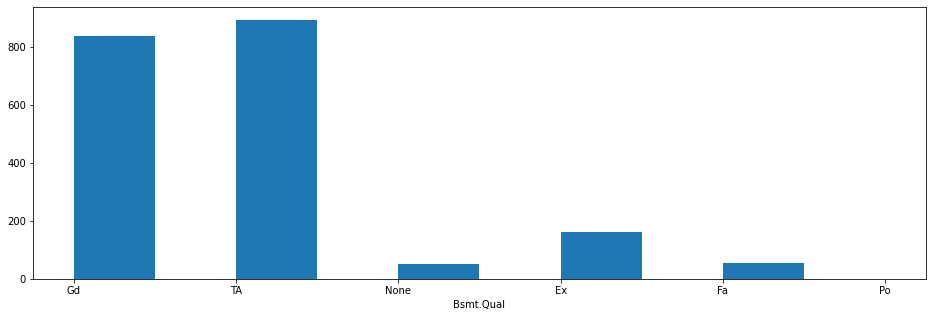

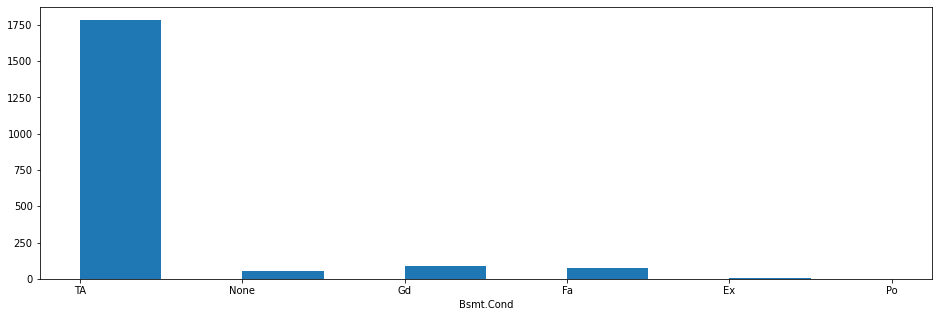

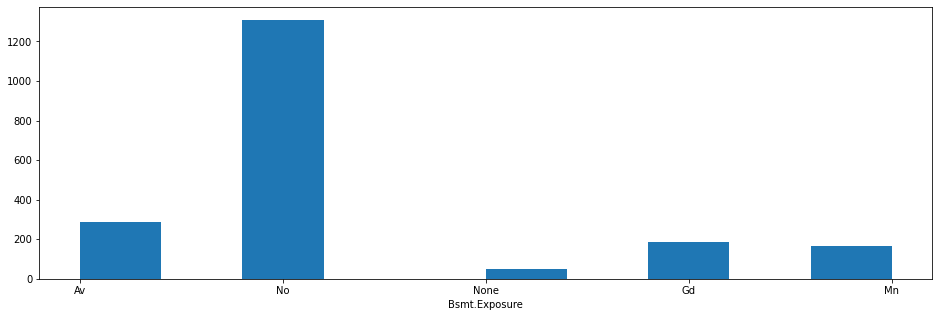

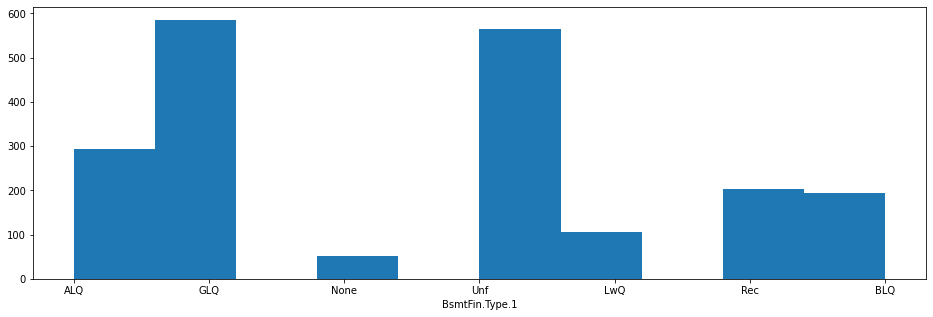

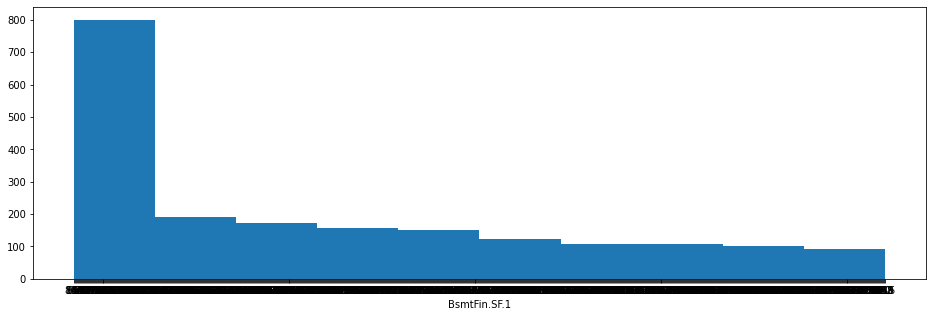

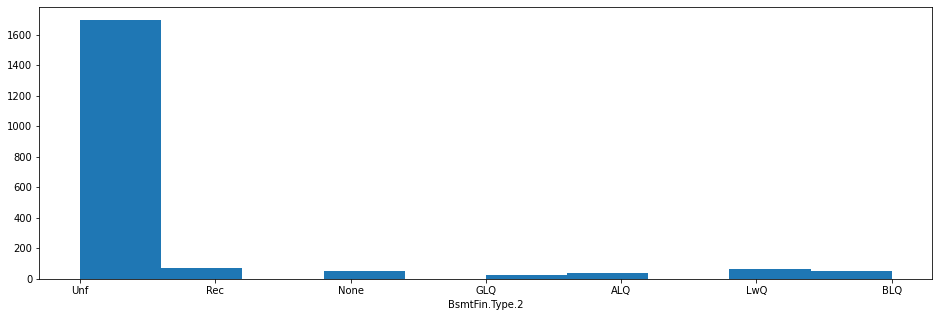

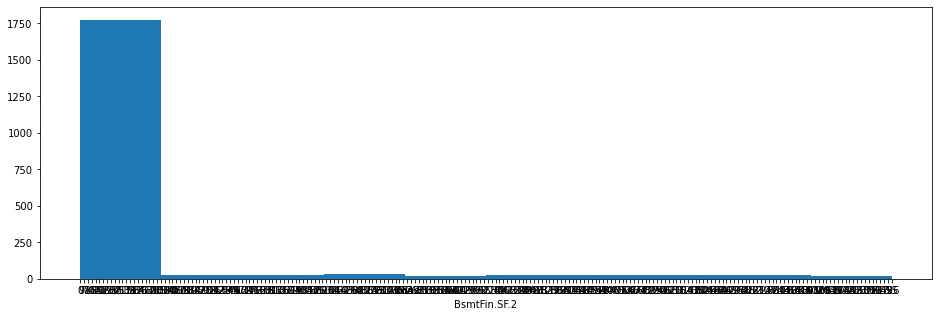

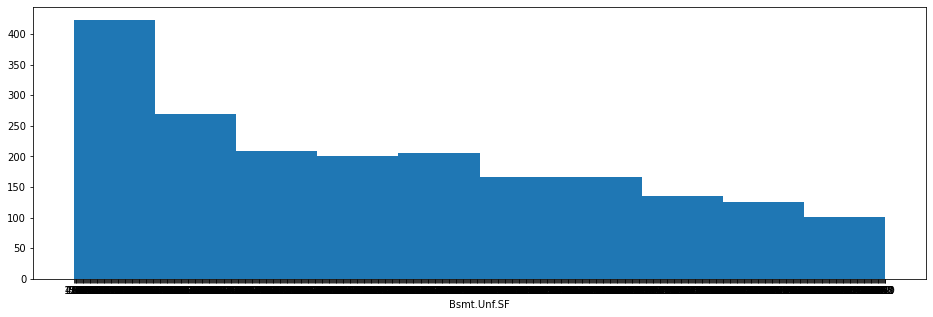

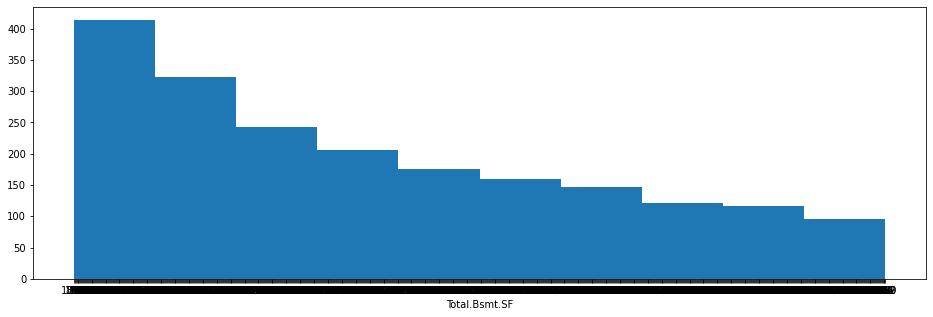

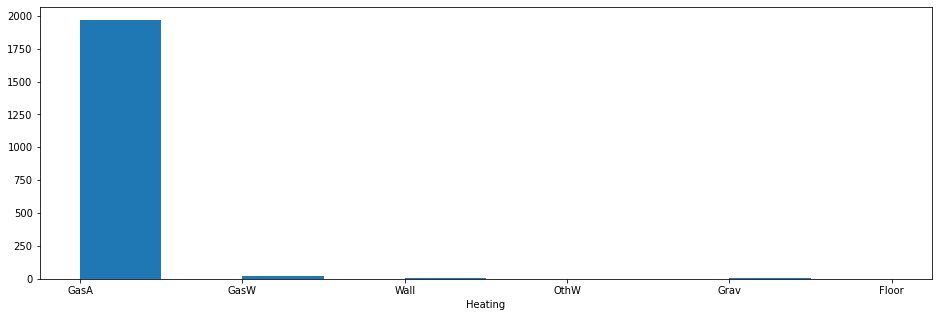

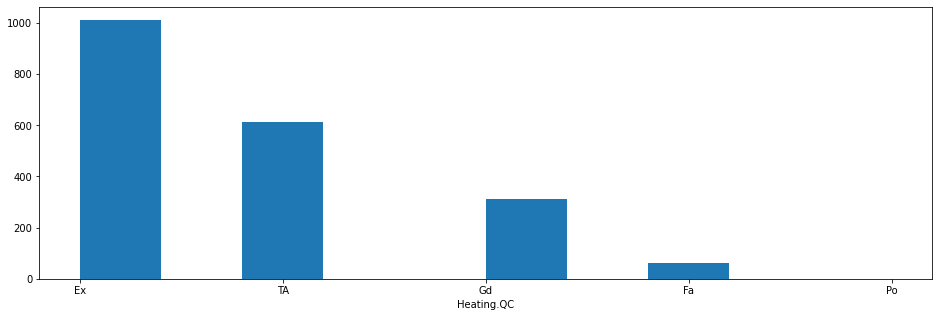

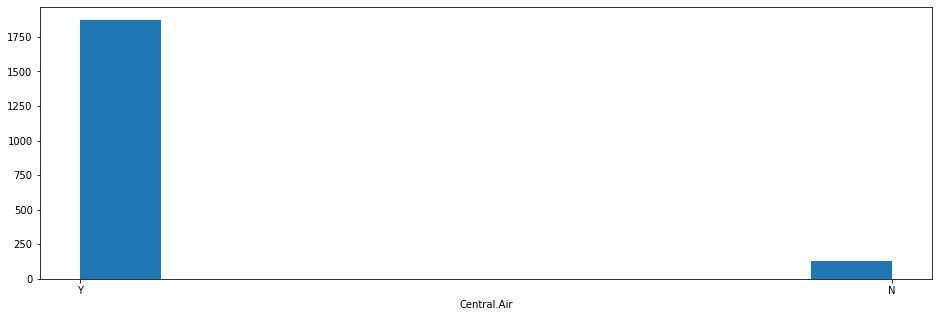

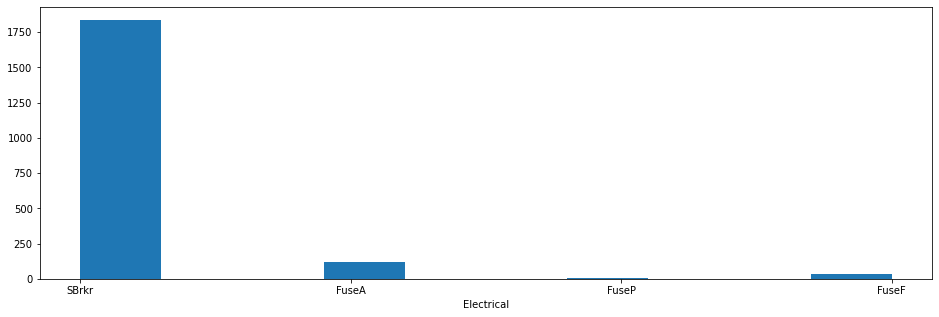

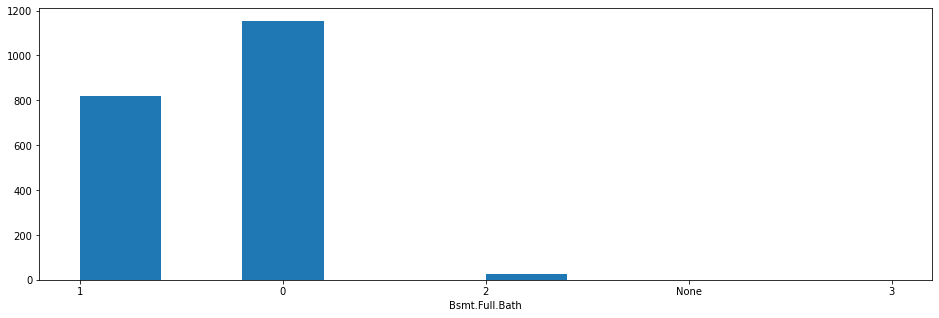

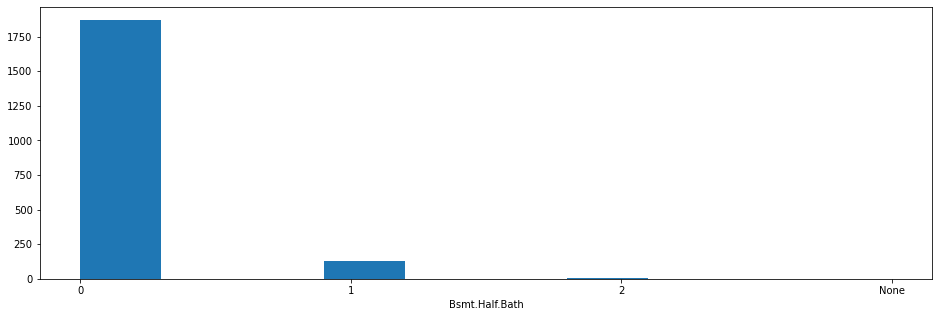

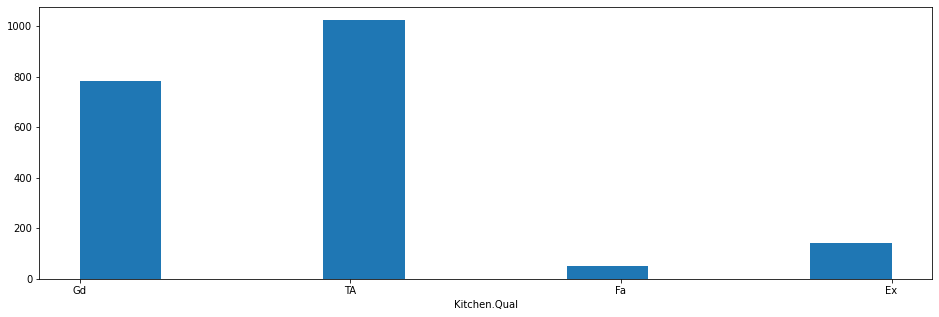

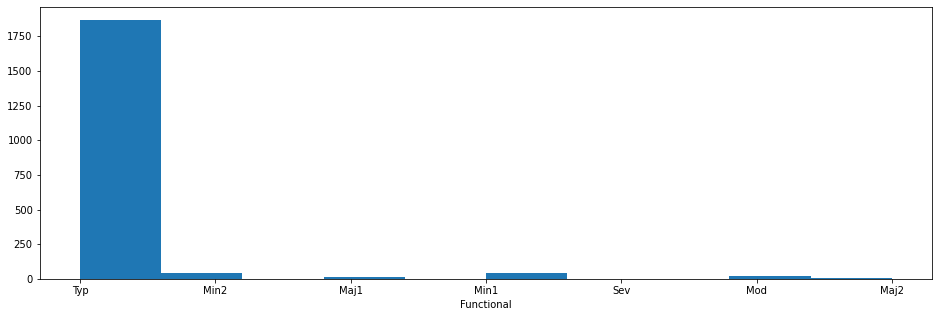

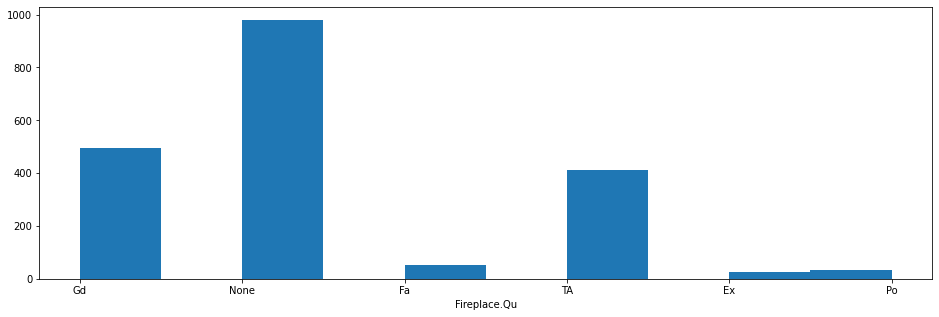

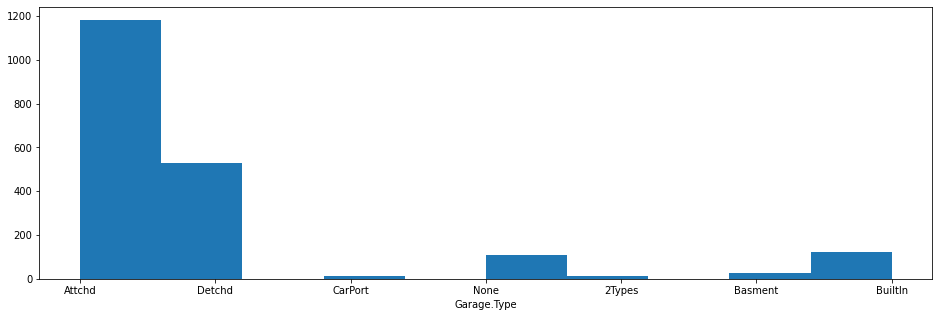

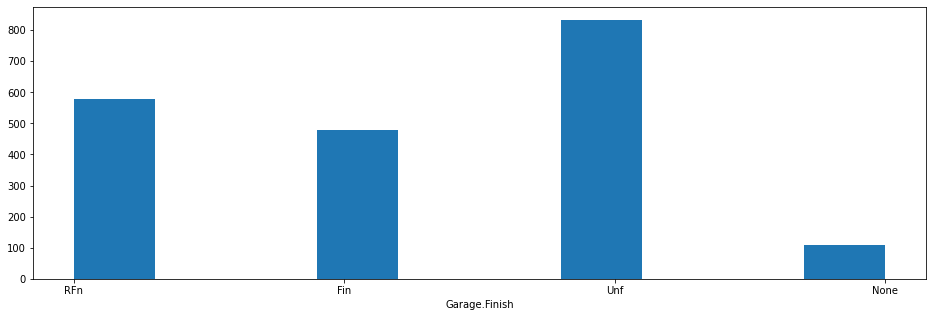

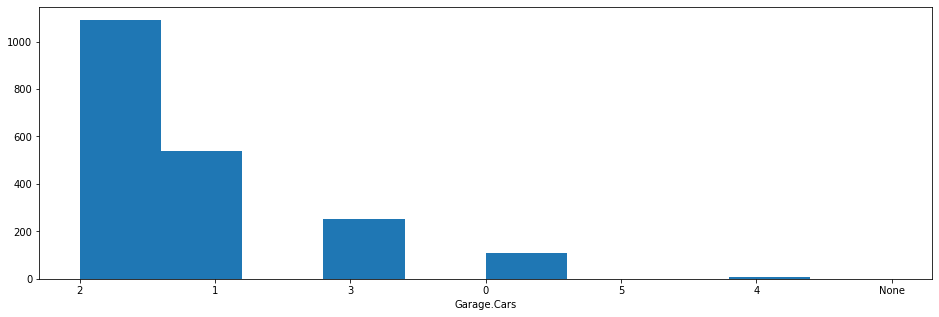

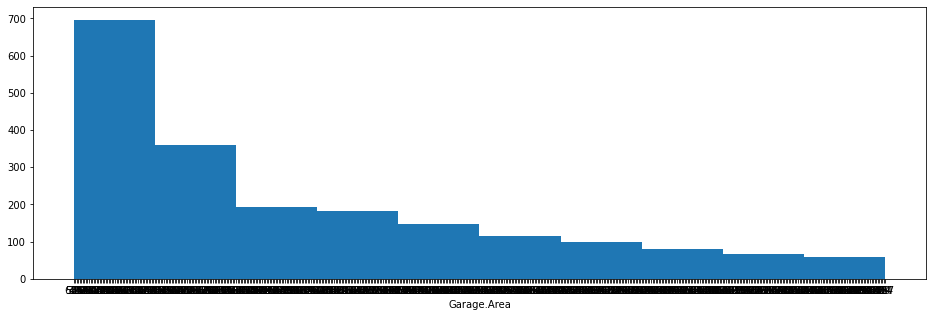

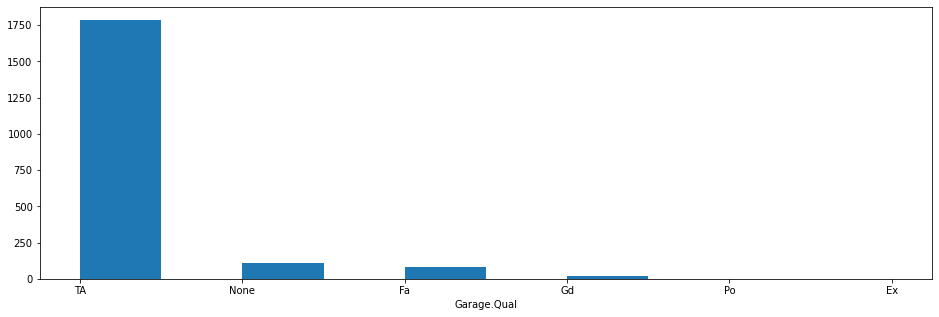

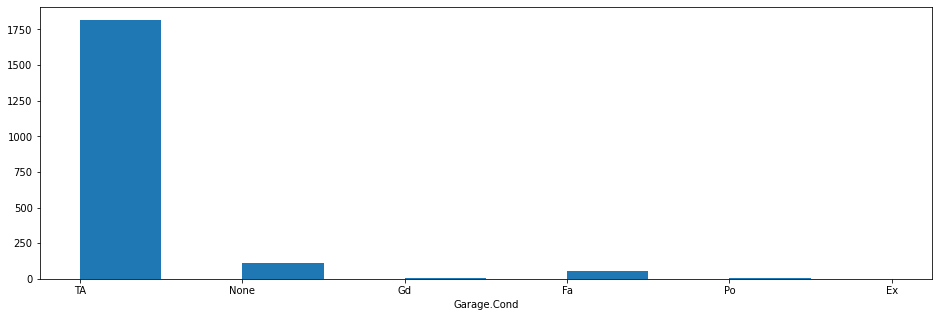

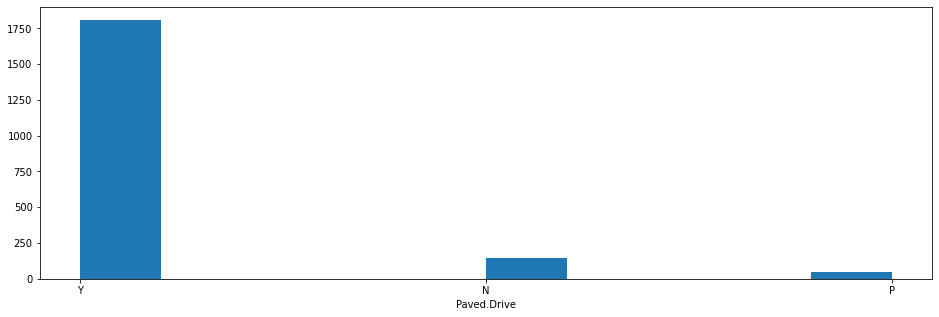

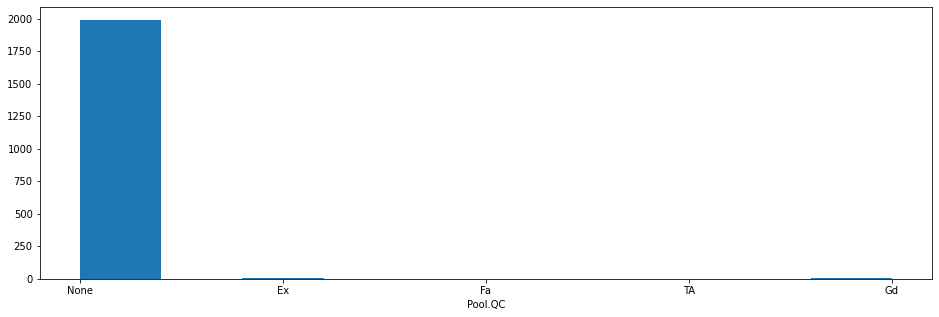

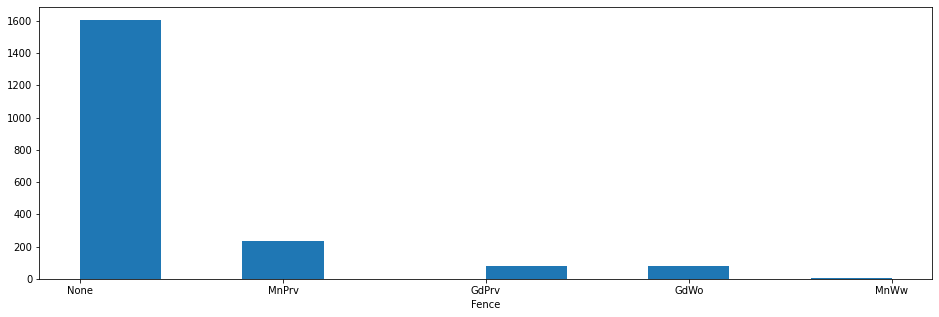

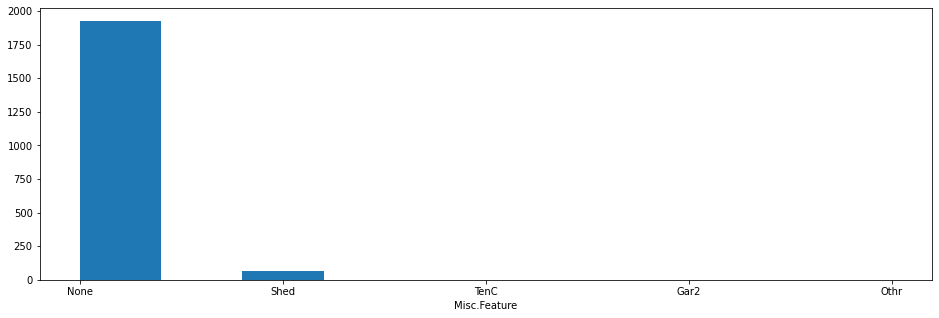

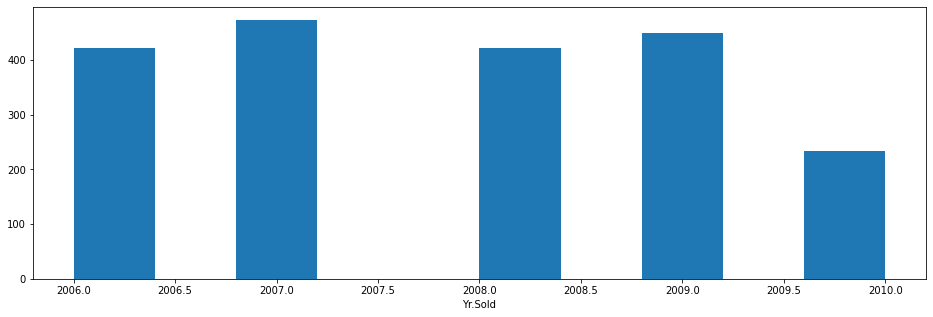

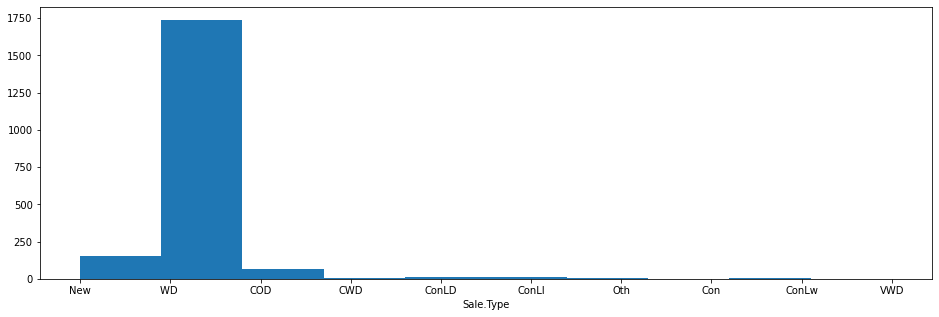

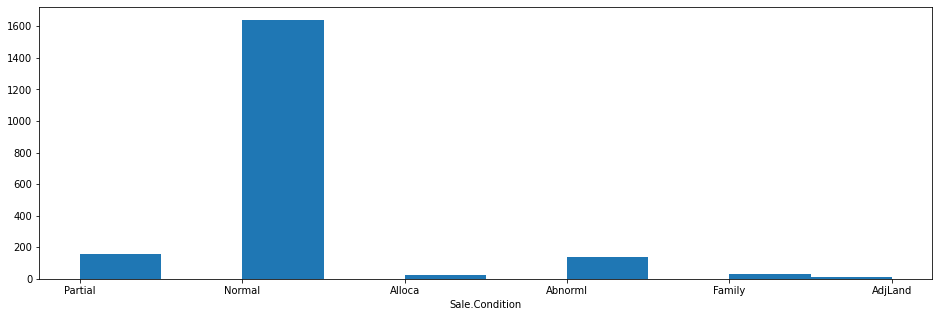

In [59]:
# sprawdzenie jak prezentują się te dane na histogramie
for feature in data_obj:
    plt.figure(figsize=(16, 5))
    plt.hist(x = data[feature])
    plt.xlabel(feature)
    plt.show()

In [60]:
for feature in data_obj:
    print(feature)
    print(data[feature].value_counts()/2000*100)

MS.Zoning
RL         77.45
RM         15.85
FV          5.15
RH          0.80
C (all)     0.65
I (all)     0.05
A (agr)     0.05
Name: MS.Zoning, dtype: float64
Lot.Frontage
None    16.70
60       9.15
80       4.85
70       4.75
50       4.15
        ...  
117      0.05
135      0.05
25       0.05
182      0.05
133      0.05
Name: Lot.Frontage, Length: 121, dtype: float64
Street
Pave    99.6
Grvl     0.4
Name: Street, dtype: float64
Alley
None    93.25
Grvl     4.25
Pave     2.50
Name: Alley, dtype: float64
Lot.Shape
Reg    63.75
IR1    32.85
IR2     2.75
IR3     0.65
Name: Lot.Shape, dtype: float64
Land.Contour
Lvl    90.45
Bnk     3.75
HLS     3.70
Low     2.10
Name: Land.Contour, dtype: float64
Utilities
AllPub    100.0
Name: Utilities, dtype: float64
Lot.Config
Inside     72.60
Corner     17.20
CulDSac     6.45
FR2         3.05
FR3         0.70
Name: Lot.Config, dtype: float64
Land.Slope
Gtl    95.0
Mod     4.3
Sev     0.7
Name: Land.Slope, dtype: float64
Neighborhood
Nonemes    1

In [61]:
#część zmiennych typu object wg dokumentacji jest ciągła - warto zamienic te typy
# Lot.Frontage
# Mas.Vnr.Area
# BsmtFin.SF.1
# BsmtFin.SF.2
# Bsmt.Unf.SF
# Total.Bsmt.SF
# Garage.Area

In [62]:
do_zmiany= ('Lot.Frontage','Mas.Vnr.Area','BsmtFin.SF.1','BsmtFin.SF.2','Bsmt.Unf.SF','Total.Bsmt.SF','Garage.Area')

In [63]:
#zamiana None na zero
for column in do_zmiany:
    data.loc[data[column] == 'None', column] = 0

In [64]:
#sprawdzenie po zmianie
for column in do_zmiany:
    print(data[column].value_counts())

0      334
60     183
80      97
70      95
50      83
      ... 
136      1
126      1
25       1
182      1
149      1
Name: Lot.Frontage, Length: 121, dtype: int64
0      1215
0        16
120      10
216       9
108       9
       ... 
137       1
572       1
481       1
253       1
426       1
Name: Mas.Vnr.Area, Length: 363, dtype: int64
0      617
24      21
16       9
20       8
500      7
      ... 
811      1
725      1
477      1
576      1
0        1
Name: BsmtFin.SF.1, Length: 817, dtype: int64
0      1746
180       4
144       3
435       3
294       3
       ... 
600       1
321       1
491       1
891       1
0         1
Name: BsmtFin.SF.2, Length: 212, dtype: int64
0       170
384      13
672      10
768       9
728       9
       ... 
774       1
647       1
155       1
1349      1
0         1
Name: Bsmt.Unf.SF, Length: 928, dtype: int64
864     56
0       52
672     23
1040    22
768     21
        ..
818      1
1869     1
1499     1
1555     1
0        1
Name: Total.

In [65]:
#zamiana typu zmiennych
for column in do_zmiany:
    data[column] = data[column].astype(int)

In [66]:
#sprawdzenie po zmianie
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 80 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   MS.SubClass      2000 non-null   int64 
 1   MS.Zoning        2000 non-null   object
 2   Lot.Frontage     2000 non-null   int32 
 3   Lot.Area         2000 non-null   int64 
 4   Street           2000 non-null   object
 5   Alley            2000 non-null   object
 6   Lot.Shape        2000 non-null   object
 7   Land.Contour     2000 non-null   object
 8   Utilities        2000 non-null   object
 9   Lot.Config       2000 non-null   object
 10  Land.Slope       2000 non-null   object
 11  Neighborhood     2000 non-null   object
 12  Condition.1      2000 non-null   object
 13  Condition.2      2000 non-null   object
 14  Bldg.Type        2000 non-null   object
 15  House.Style      2000 non-null   object
 16  Overall.Qual     2000 non-null   int64 
 17  Overall.Cond     2000 non-null   

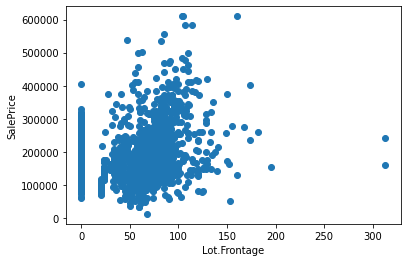

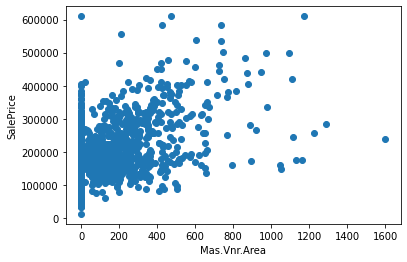

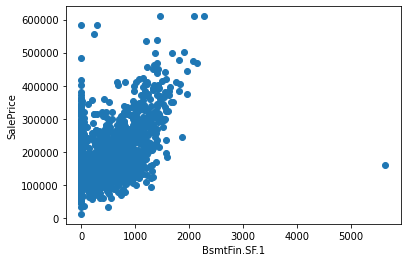

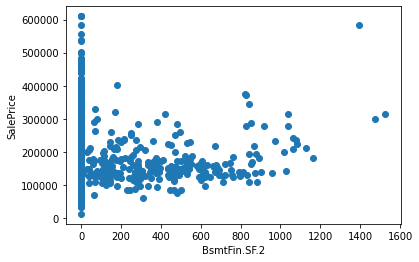

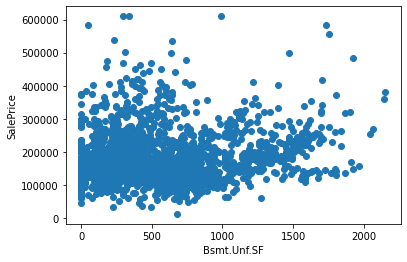

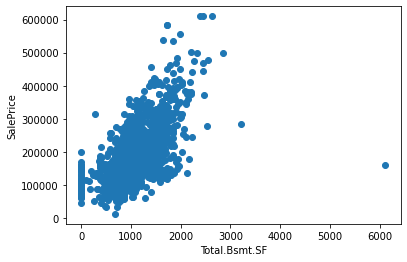

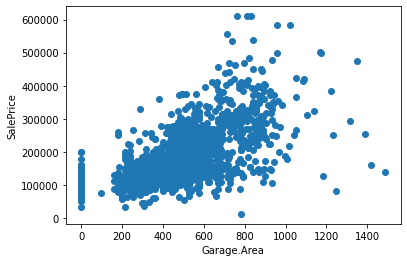

In [67]:
#zmienne są już liczbami.
#sprawdznie jak prezentują się na wykresie rozrzutu
for feature in do_zmiany:
    plt.scatter(x = data[feature],
               y = data['SalePrice'])
    plt.ylabel('SalePrice')
    plt.xlabel(feature)
    plt.show()

In [68]:
# pojawiły się wartości ostające - tak jak wcześniej zamienię je na maksymalne wartości wśród danych 'nieodstających'

In [69]:
data[data['Lot.Frontage'] > 180]['Lot.Frontage']

578     182
835     313
1233    313
1520    195
Name: Lot.Frontage, dtype: int32

In [70]:
data.loc[data['Lot.Frontage'] > 195, 'Lot.Frontage'] = 195

In [71]:
data[data['Mas.Vnr.Area'] > 1250]['Mas.Vnr.Area']

281     1290
1572    1600
Name: Mas.Vnr.Area, dtype: int32

In [72]:
data.loc[data['Mas.Vnr.Area'] > 1290, 'Mas.Vnr.Area'] = 1290

In [73]:
data[data['BsmtFin.SF.1'] > 2100]['BsmtFin.SF.1']

133     2158
663     2288
1233    5644
Name: BsmtFin.SF.1, dtype: int32

In [74]:
data.loc[data['BsmtFin.SF.1'] > 2288, 'BsmtFin.SF.1'] = 2288

In [75]:
data[data['Total.Bsmt.SF'] > 3000]['Total.Bsmt.SF']

769     3206
1233    6110
Name: Total.Bsmt.SF, dtype: int32

In [76]:
data.loc[data['Total.Bsmt.SF'] > 3206, 'Total.Bsmt.SF'] = 3206

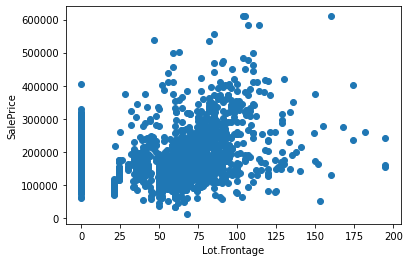

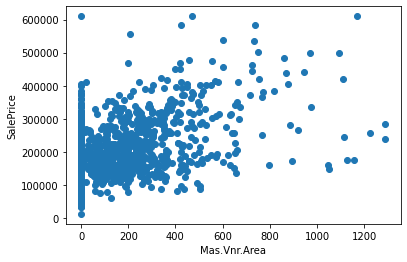

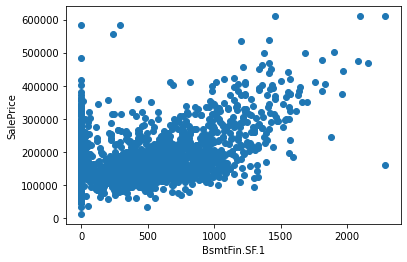

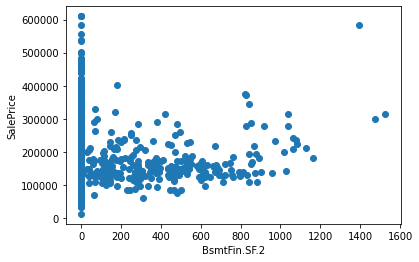

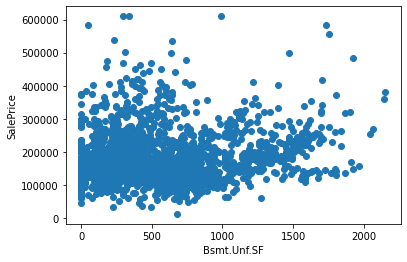

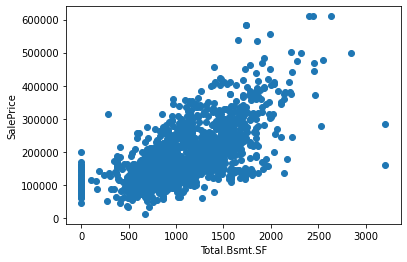

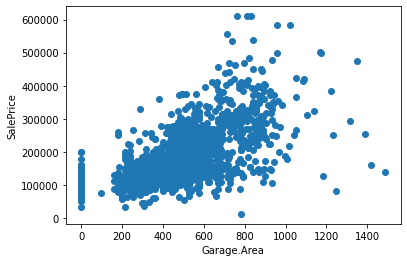

In [77]:
#sprawdzenie po zmianach
for feature in do_zmiany:
    plt.scatter(x = data[feature],
               y = data['SalePrice'])
    plt.ylabel('SalePrice')
    plt.xlabel(feature)
    plt.show()

## Zmienna celu (cena domu): SalePrice

In [78]:
#statystyki podstawowe
data.SalePrice.describe()

count      2000.000000
mean     180100.902000
std       77564.340741
min       12789.000000
25%      129000.000000
50%      160000.000000
75%      213492.500000
max      610000.000000
Name: SalePrice, dtype: float64

<AxesSubplot:xlabel='SalePrice'>

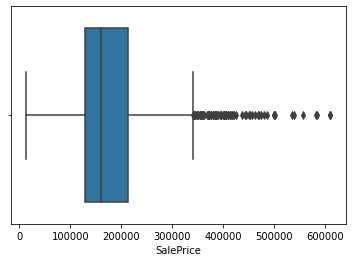

In [79]:
sns.boxplot(data.SalePrice)

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

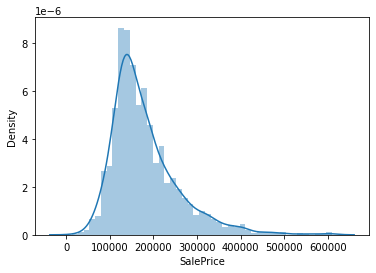

In [80]:
#sprawdzenie gęstości zmiennej celu
sns.distplot(data['SalePrice'])

In [81]:
#sprawdzenie skośności zmiennej celu
data['SalePrice'].skew()

1.578231596829189

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

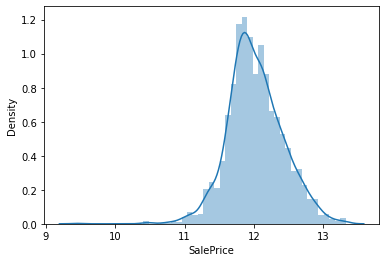

In [82]:
## rozkład zmieneej celu jest prawoskośny - sprawdzenie gęstości logarytmu f.celu
sns.distplot(np.log(data['SalePrice']))

In [83]:
#zamiana zmiennej celu na logarytm
data['SalePrice'] = np.log(data['SalePrice'])

In [84]:
#sprawdzenie skośności
data['SalePrice'].skew()

0.02115482869324984

## Przygotowanie zmiennych do modelowania

Zamiana zmiennych na int poprzez:

Integer Encoding

One-Hot Encoding

In [85]:
#sprawdzenie które zmienne wymagają zmian
data_obj2 = data.select_dtypes(include=['object']).columns
data_obj2

Index(['MS.Zoning', 'Street', 'Alley', 'Lot.Shape', 'Land.Contour',
       'Utilities', 'Lot.Config', 'Land.Slope', 'Neighborhood', 'Condition.1',
       'Condition.2', 'Bldg.Type', 'House.Style', 'Roof.Style', 'Roof.Matl',
       'Exterior.1st', 'Exterior.2nd', 'Mas.Vnr.Type', 'Exter.Qual',
       'Exter.Cond', 'Foundation', 'Bsmt.Qual', 'Bsmt.Cond', 'Bsmt.Exposure',
       'BsmtFin.Type.1', 'BsmtFin.Type.2', 'Heating', 'Heating.QC',
       'Central.Air', 'Electrical', 'Bsmt.Full.Bath', 'Bsmt.Half.Bath',
       'Kitchen.Qual', 'Functional', 'Fireplace.Qu', 'Garage.Type',
       'Garage.Finish', 'Garage.Cars', 'Garage.Qual', 'Garage.Cond',
       'Paved.Drive', 'Pool.QC', 'Fence', 'Misc.Feature', 'Yr.Sold',
       'Sale.Type', 'Sale.Condition'],
      dtype='object')

In [86]:
#sprawdzenie jakie wartości zawierają te zmienne
for feature in data_obj2:
    print(feature)
    print(data[feature].value_counts()/2000*100)

MS.Zoning
RL         77.45
RM         15.85
FV          5.15
RH          0.80
C (all)     0.65
I (all)     0.05
A (agr)     0.05
Name: MS.Zoning, dtype: float64
Street
Pave    99.6
Grvl     0.4
Name: Street, dtype: float64
Alley
None    93.25
Grvl     4.25
Pave     2.50
Name: Alley, dtype: float64
Lot.Shape
Reg    63.75
IR1    32.85
IR2     2.75
IR3     0.65
Name: Lot.Shape, dtype: float64
Land.Contour
Lvl    90.45
Bnk     3.75
HLS     3.70
Low     2.10
Name: Land.Contour, dtype: float64
Utilities
AllPub    100.0
Name: Utilities, dtype: float64
Lot.Config
Inside     72.60
Corner     17.20
CulDSac     6.45
FR2         3.05
FR3         0.70
Name: Lot.Config, dtype: float64
Land.Slope
Gtl    95.0
Mod     4.3
Sev     0.7
Name: Land.Slope, dtype: float64
Neighborhood
Nonemes    15.15
CollgCr     9.60
OldTown     8.30
Somerst     6.70
Edwards     6.70
Sawyer      5.35
NridgHt     5.20
Gilbert     4.95
NWAmes      4.60
SawyerW     4.00
BrkSide     3.90
Crawfor     3.65
Mitchel     3.60
IDOTRR

1. Zmienne, które mają wartości Y/N zamienię na 1/0
2. Zmienne, które mają tylko 2 wartości zamienię na 1 lub 0
3. Zmienne, których wartości wg dokumentacji są ocenami zamienię na oceny
4. Reszta zmiennych będzie obsłużona algorytmem One Hot Encoding

In [87]:
#Y/N

In [88]:
data['Central.Air'].value_counts()

Y    1873
N     127
Name: Central.Air, dtype: int64

In [89]:
data.loc[data['Central.Air'] == 'Y', 'Central.Air'] = 1
data.loc[data['Central.Air'] == 'N', 'Central.Air'] = 0
data['Central.Air'] = data['Central.Air'].astype(int)
data['Central.Air'].value_counts()

1    1873
0     127
Name: Central.Air, dtype: int64

In [90]:
#2 wartości w całym zbiorze

In [91]:
data['Street'].value_counts()

Pave    1992
Grvl       8
Name: Street, dtype: int64

In [92]:
data.loc[data['Street'] == 'Pave', 'Street'] = 1 #brukowana lepsza
data.loc[data['Street'] == 'Grvl', 'Street'] = 0
data['Street'] = data['Street'].astype(int)
data['Street'].value_counts()

1    1992
0       8
Name: Street, dtype: int64

In [93]:
#oceny

In [94]:
# 5-cio stopniowa skala ocen + braki = 0
def oceny5(zmienna):
    data[zmienna].replace({'Po':1,
                           'Fa':2,
                           'TA':3,
                           'Gd':4,
                           'Ex':5,
                           'NA':0,
                           'None':0}, inplace=True)
    print(data[zmienna].value_counts(sort = False))

In [95]:
oceny5('Exter.Qual')
oceny5('Exter.Cond')
oceny5('Bsmt.Qual')
oceny5('Bsmt.Cond')
oceny5('Heating.QC')
oceny5('Kitchen.Qual')
oceny5('Garage.Cond')
oceny5('Garage.Qual')
oceny5('Pool.QC')
oceny5('Fireplace.Qu')

2      21
3    1230
4     683
5      66
Name: Exter.Qual, dtype: int64
2      40
3    1734
4     218
5       8
Name: Exter.Cond, dtype: int64
0     52
1      1
2     54
3    893
4    837
5    163
Name: Bsmt.Qual, dtype: int64
0      52
1       2
2      71
3    1784
4      88
5       3
Name: Bsmt.Cond, dtype: int64
1       1
2      61
3     613
4     313
5    1012
Name: Heating.QC, dtype: int64
2      50
3    1025
4     785
5     140
Name: Kitchen.Qual, dtype: int64
0     111
1       8
2      53
3    1817
4       9
5       2
Name: Garage.Cond, dtype: int64
0     111
1       2
2      84
3    1786
4      16
5       1
Name: Garage.Qual, dtype: int64
0    1989
2       2
3       2
4       4
5       3
Name: Pool.QC, dtype: int64
0    980
1     34
2     51
3    413
4    497
5     25
Name: Fireplace.Qu, dtype: int64


In [96]:
# 6-cio stopniowa skala ocen + braki = 0
def oceny6(zmienna):
    data[zmienna].replace({'Unf':1,
                           'LwQ':2,
                           'Rec':3,
                           'BLQ':4,
                           'ALQ':5,
                           'GLQ':6,
                           'None':0}, inplace=True)
    print(data[zmienna].value_counts(sort = False))

In [97]:
oceny6('BsmtFin.Type.1')
oceny6('BsmtFin.Type.2')

0     52
1    565
2    106
3    204
4    195
5    293
6    585
Name: BsmtFin.Type.1, dtype: int64
0      52
1    1696
2      67
3      70
4      50
5      38
6      27
Name: BsmtFin.Type.2, dtype: int64


In [98]:
#inne zmienne, które wg dokumentacji są porządkowe, a nie zostały zmienione na oceny przy użyciu powyższych funkcji
# Lot.Shape
# Utilities
# Land.Slope
# Bsmt.Exposure
# Electrical
# Functional
# Garage.Finish
# Paved.Drive
# Fence

In [99]:
#funckja, która zamieni dane w wymienionych zmiennych na oceny
def oceny_rest(zmienna):
    data[zmienna].replace({
        'Reg' : 4,
        'IR1' : 3,
        'IR2' : 2,
        'IR3' : 1,

        'AllPub' : 4,
        'NoSewr' : 3,
        'NoSeWa' : 2,
        'ELO' : 1,

        'Gtl' : 3,
        'Mod' : 2,
        'Sev' : 1,

        'Gd' : 4,
        'Av' : 3,
        'Mn' : 2,
        'No' : 1,
        'NA' : 0,

        'SBrkr' : 5,
        'FuseA' : 4,
        'FuseF' : 3,
        'FuseP' : 2,
        'Mix' : 1,

        'Typ' : 8,
        'Min1' : 7,
        'Min2' : 6,
        'Mod' : 5,
        'Maj1' : 4,
        'Maj2' : 3,
        'Sev' : 2,
        'Sal' : 1,

        'Fin' : 3,
        'RFn' : 2,
        'Unf' : 1,

        'Y' : 3,
        'P' : 2,
        'N' : 1,
        
        'GdPrv' : 4,
        'MnPrv' : 3,
        'GdWo' : 2,
        'MnWw' : 1,
        
        'None':0
 
       }, inplace=True)
    print(data[zmienna].value_counts(sort = False))

In [100]:
#zmienne do zmiany
pozostale_oceny = ('Lot.Shape',
                   'Utilities',
                   'Land.Slope',
                   'Bsmt.Exposure',
                   'Electrical',
                   'Functional',
                   'Garage.Finish',
                   'Paved.Drive',
                   'Fence')

In [101]:
for zmienna in pozostale_oceny:
    oceny_rest(zmienna)

1      13
2      55
3     657
4    1275
Name: Lot.Shape, dtype: int64
4    2000
Name: Utilities, dtype: int64
2      14
3    1900
5      86
Name: Land.Slope, dtype: int64
0      52
1    1309
2     166
3     285
4     188
Name: Bsmt.Exposure, dtype: int64
2       4
3      37
4     122
5    1837
Name: Electrical, dtype: int64
2       2
3       5
4      13
5      23
6      45
7      44
8    1868
Name: Functional, dtype: int64
0    110
1    833
2    578
3    479
Name: Garage.Finish, dtype: int64
1     145
2      46
3    1809
Name: Paved.Drive, dtype: int64
0    1605
1       7
2      78
3     232
4      78
Name: Fence, dtype: int64


In [102]:
# po zmianie typ zmiennych powinien zmienić się na int
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 80 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MS.SubClass      2000 non-null   int64  
 1   MS.Zoning        2000 non-null   object 
 2   Lot.Frontage     2000 non-null   int32  
 3   Lot.Area         2000 non-null   int64  
 4   Street           2000 non-null   int32  
 5   Alley            2000 non-null   object 
 6   Lot.Shape        2000 non-null   int64  
 7   Land.Contour     2000 non-null   object 
 8   Utilities        2000 non-null   int64  
 9   Lot.Config       2000 non-null   object 
 10  Land.Slope       2000 non-null   int64  
 11  Neighborhood     2000 non-null   object 
 12  Condition.1      2000 non-null   object 
 13  Condition.2      2000 non-null   object 
 14  Bldg.Type        2000 non-null   object 
 15  House.Style      2000 non-null   object 
 16  Overall.Qual     2000 non-null   int64  
 17  Overall.Cond  

In [103]:
# sprawdzenie jakie zmienne typu obiekt zostały w zbiorze danych
#(jeżeli nie uda się ich przekształcić w inny sposób, przystąpię do OHE)

pozostale_obj = data.select_dtypes(include=['object']).columns
pozostale_obj

Index(['MS.Zoning', 'Alley', 'Land.Contour', 'Lot.Config', 'Neighborhood',
       'Condition.1', 'Condition.2', 'Bldg.Type', 'House.Style', 'Roof.Style',
       'Roof.Matl', 'Exterior.1st', 'Exterior.2nd', 'Mas.Vnr.Type',
       'Foundation', 'Heating', 'Bsmt.Full.Bath', 'Bsmt.Half.Bath',
       'Garage.Type', 'Garage.Cars', 'Misc.Feature', 'Yr.Sold', 'Sale.Type',
       'Sale.Condition'],
      dtype='object')

In [104]:
#sprawdzenie jakie wartości zawierają poszczególne zmienne
for feature in pozostale_obj:
    print(feature)
    print(data[feature].value_counts())

MS.Zoning
RL         1549
RM          317
FV          103
RH           16
C (all)      13
I (all)       1
A (agr)       1
Name: MS.Zoning, dtype: int64
Alley
None    1865
Grvl      85
Pave      50
Name: Alley, dtype: int64
Land.Contour
Lvl    1809
Bnk      75
HLS      74
Low      42
Name: Land.Contour, dtype: int64
Lot.Config
Inside     1452
Corner      344
CulDSac     129
FR2          61
FR3          14
Name: Lot.Config, dtype: int64
Neighborhood
Nonemes    303
CollgCr    192
OldTown    166
Somerst    134
Edwards    134
Sawyer     107
NridgHt    104
Gilbert     99
NWAmes      92
SawyerW     80
BrkSide     78
Crawfor     73
Mitchel     72
IDOTRR      62
NoRidge     56
Timber      48
StoneBr     38
ClearCr     33
SWISU       31
MeadowV     28
Veenker     15
NPkVill     14
Blmngtn     14
BrDale      13
Blueste      8
Greens       5
GrnHill      1
Name: Neighborhood, dtype: int64
Condition.1
Norm      1721
Feedr      113
Artery      61
RRAn        33
PosN        25
RRAe        20
PosA    

In [105]:
# niektóre zmienne można zamienić na ciągłe, ale przeszkadza "None" - zamienię na 0

In [106]:
#zamiana None na 0 oraz zamiana typu
def na_int(zmienna):
    data.loc[data[zmienna] == 'None', zmienna] = 0
    data[zmienna] = data[zmienna].astype(int)
    data[zmienna].value_counts()

In [107]:
na_int('Central.Air')
na_int('Bsmt.Full.Bath')
na_int('Bsmt.Half.Bath')
na_int('Garage.Cars')
na_int('Overall.Qual')
na_int('Overall.Cond')
na_int('Garage.Yr.Blt')

In [108]:
#sprawdzenie pozostałych zmiennych typu object
pozostale_obj = data.select_dtypes(include=['object']).columns
pozostale_obj

Index(['MS.Zoning', 'Alley', 'Land.Contour', 'Lot.Config', 'Neighborhood',
       'Condition.1', 'Condition.2', 'Bldg.Type', 'House.Style', 'Roof.Style',
       'Roof.Matl', 'Exterior.1st', 'Exterior.2nd', 'Mas.Vnr.Type',
       'Foundation', 'Heating', 'Garage.Type', 'Misc.Feature', 'Yr.Sold',
       'Sale.Type', 'Sale.Condition'],
      dtype='object')

In [109]:
#ostatnie wyświetlenie wartości zmiennych - sprawdzenie czy nic nie umknęło
for feature in pozostale_obj:
    print(feature)
    print(data[feature].value_counts())

MS.Zoning
RL         1549
RM          317
FV          103
RH           16
C (all)      13
I (all)       1
A (agr)       1
Name: MS.Zoning, dtype: int64
Alley
None    1865
Grvl      85
Pave      50
Name: Alley, dtype: int64
Land.Contour
Lvl    1809
Bnk      75
HLS      74
Low      42
Name: Land.Contour, dtype: int64
Lot.Config
Inside     1452
Corner      344
CulDSac     129
FR2          61
FR3          14
Name: Lot.Config, dtype: int64
Neighborhood
Nonemes    303
CollgCr    192
OldTown    166
Somerst    134
Edwards    134
Sawyer     107
NridgHt    104
Gilbert     99
NWAmes      92
SawyerW     80
BrkSide     78
Crawfor     73
Mitchel     72
IDOTRR      62
NoRidge     56
Timber      48
StoneBr     38
ClearCr     33
SWISU       31
MeadowV     28
Veenker     15
NPkVill     14
Blmngtn     14
BrDale      13
Blueste      8
Greens       5
GrnHill      1
Name: Neighborhood, dtype: int64
Condition.1
Norm      1721
Feedr      113
Artery      61
RRAn        33
PosN        25
RRAe        20
PosA    

In [110]:
# resztę zmiennych zostaną zamienione poprzez one hot encoding

In [111]:
data = pd.get_dummies(data=data,
                      drop_first=True)
data

,MS.SubClass,Lot.Frontage,Lot.Area,Street,Lot.Shape,Utilities,Land.Slope,Overall.Qual,Overall.Cond,Year.Built,Year.Remod.Add,Mas.Vnr.Area,Exter.Qual,Exter.Cond,Bsmt.Qual,Bsmt.Cond,Bsmt.Exposure,BsmtFin.Type.1,BsmtFin.SF.1,BsmtFin.Type.2,BsmtFin.SF.2,Bsmt.Unf.SF,Total.Bsmt.SF,Heating.QC,Central.Air,Electrical,X1st.Flr.SF,X2nd.Flr.SF,Low.Qual.Fin.SF,Gr.Liv.Area,Bsmt.Full.Bath,Bsmt.Half.Bath,Full.Bath,Half.Bath,Bedroom.AbvGr,Kitchen.AbvGr,Kitchen.Qual,TotRms.AbvGrd,Functional,Fireplaces,Fireplace.Qu,Garage.Yr.Blt,Garage.Finish,Garage.Cars,Garage.Area,Garage.Qual,Garage.Cond,Paved.Drive,Wood.Deck.SF,Open.Porch.SF,Enclosed.Porch,X3Ssn.Porch,Screen.Porch,Pool.Area,Pool.QC,Fence,Misc.Val,Mo.Sold,SalePrice,MS.Zoning_C (all),MS.Zoning_FV,MS.Zoning_I (all),MS.Zoning_RH,MS.Zoning_RL,MS.Zoning_RM,Alley_None,Alley_Pave,Land.Contour_HLS,Land.Contour_Low,Land.Contour_Lvl,Lot.Config_CulDSac,Lot.Config_FR2,Lot.Config_FR3,Lot.Config_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_GrnHill,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_Nonemes,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition.1_Feedr,Condition.1_Norm,Condition.1_PosA,Condition.1_PosN,Condition.1_RRAe,Condition.1_RRAn,Condition.1_RRNe,Condition.1_RRNn,Condition.2_Feedr,Condition.2_Norm,Condition.2_PosA,Condition.2_PosN,Condition.2_RRAn,Condition.2_RRNn,Bldg.Type_2fmCon,Bldg.Type_Duplex,Bldg.Type_Twnhs,Bldg.Type_TwnhsE,House.Style_1.5Unf,House.Style_1Story,House.Style_2.5Fin,House.Style_2.5Unf,House.Style_2Story,House.Style_SFoyer,House.Style_SLvl,Roof.Style_Gable,Roof.Style_Gambrel,Roof.Style_Hip,Roof.Style_Mansard,Roof.Style_Shed,Roof.Matl_CompShg,Roof.Matl_Membran,Roof.Matl_Metal,Roof.Matl_Tar&Grv,Roof.Matl_WdShake,Roof.Matl_WdShngl,Exterior.1st_AsphShn,Exterior.1st_BrkComm,Exterior.1st_BrkFace,Exterior.1st_CBlock,Exterior.1st_CemntBd,Exterior.1st_HdBoard,Exterior.1st_MetalSd,Exterior.1st_Plywood,Exterior.1st_Stone,Exterior.1st_Stucco,Exterior.1st_VinylSd,Exterior.1st_Wd Sdng,Exterior.1st_WdShing,Exterior.2nd_AsphShn,Exterior.2nd_Brk Cmn,Exterior.2nd_BrkFace,Exterior.2nd_CBlock,Exterior.2nd_CmentBd,Exterior.2nd_HdBoard,Exterior.2nd_ImStucc,Exterior.2nd_MetalSd,Exterior.2nd_Other,Exterior.2nd_Plywood,Exterior.2nd_Stone,Exterior.2nd_Stucco,Exterior.2nd_VinylSd,Exterior.2nd_Wd Sdng,Exterior.2nd_Wd Shng,Mas.Vnr.Type_BrkFace,Mas.Vnr.Type_CBlock,Mas.Vnr.Type_None,Mas.Vnr.Type_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Garage.Type_Attchd,Garage.Type_Basment,Garage.Type_BuiltIn,Garage.Type_CarPort,Garage.Type_Detchd,Garage.Type_None,Misc.Feature_None,Misc.Feature_Othr,Misc.Feature_Shed,Misc.Feature_TenC,Yr.Sold_2007,Yr.Sold_2008,Yr.Sold_2009,Yr.Sold_2010,Sale.Type_CWD,Sale.Type_Con,Sale.Type_ConLD,Sale.Type_ConLI,Sale.Type_ConLw,Sale.Type_New,Sale.Type_Oth,Sale.Type_VWD,Sale.Type_WD,Sale.Condition_AdjLand,Sale.Condition_Alloca,Sale.Condition_Family,Sale.Condition_Normal,Sale.Condition_Partial
0,120,34,3901,1,4,4,3,6,5,2,1,182,4,3,4,3,3,5,866,1,0,436,1302,5,1,5,1302,0,0,1302,1,0,1,1,1,1,4,5,8,1,4,2,2,2,631,3,3,3,110,50,0,0,0,0,0,0,0,8,12.225875,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
1,20,70,8400,1,4,4,3,4,5,40,40,0,3,3,3,3,1,5,804,3,78,0,882,3,1,5,882,0,0,882,1,0,1,0,2,1,3,4,8,0,0,40,3,2,525,3,3,3,240,0,0,0,0,0,0,3,0,4,11.744037,0,0,0,0,1,0,

In [112]:
#sprawdzenie formatów zmiennych
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Columns: 206 entries, MS.SubClass to Sale.Condition_Partial
dtypes: float64(1), int32(15), int64(43), uint8(147)
memory usage: 1.1 MB


In [113]:
# sprawdzenie skośności zmiennych typu int

In [114]:
zmienne_numeryczne = data.select_dtypes(exclude=['object', 'uint8']).columns
zmienne_numeryczne

Index(['MS.SubClass', 'Lot.Frontage', 'Lot.Area', 'Street', 'Lot.Shape',
       'Utilities', 'Land.Slope', 'Overall.Qual', 'Overall.Cond', 'Year.Built',
       'Year.Remod.Add', 'Mas.Vnr.Area', 'Exter.Qual', 'Exter.Cond',
       'Bsmt.Qual', 'Bsmt.Cond', 'Bsmt.Exposure', 'BsmtFin.Type.1',
       'BsmtFin.SF.1', 'BsmtFin.Type.2', 'BsmtFin.SF.2', 'Bsmt.Unf.SF',
       'Total.Bsmt.SF', 'Heating.QC', 'Central.Air', 'Electrical',
       'X1st.Flr.SF', 'X2nd.Flr.SF', 'Low.Qual.Fin.SF', 'Gr.Liv.Area',
       'Bsmt.Full.Bath', 'Bsmt.Half.Bath', 'Full.Bath', 'Half.Bath',
       'Bedroom.AbvGr', 'Kitchen.AbvGr', 'Kitchen.Qual', 'TotRms.AbvGrd',
       'Functional', 'Fireplaces', 'Fireplace.Qu', 'Garage.Yr.Blt',
       'Garage.Finish', 'Garage.Cars', 'Garage.Area', 'Garage.Qual',
       'Garage.Cond', 'Paved.Drive', 'Wood.Deck.SF', 'Open.Porch.SF',
       'Enclosed.Porch', 'X3Ssn.Porch', 'Screen.Porch', 'Pool.Area', 'Pool.QC',
       'Fence', 'Misc.Val', 'Mo.Sold', 'SalePrice'],
      dtype='obje

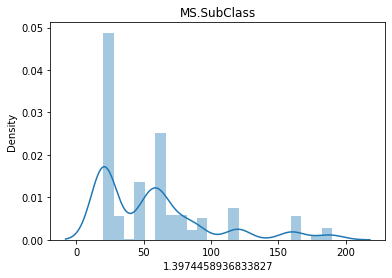

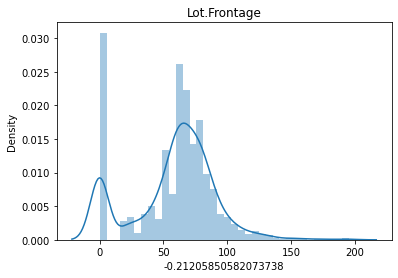

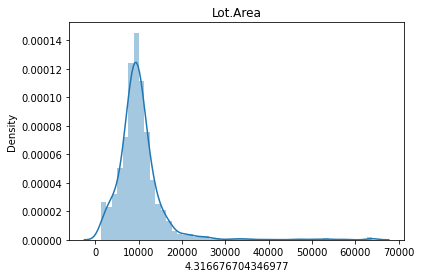

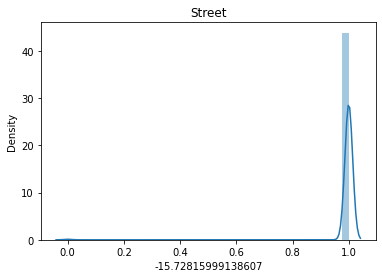

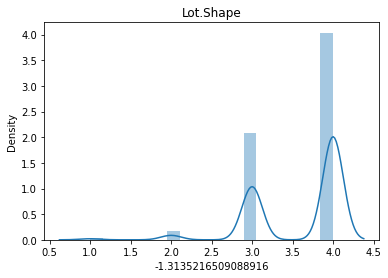

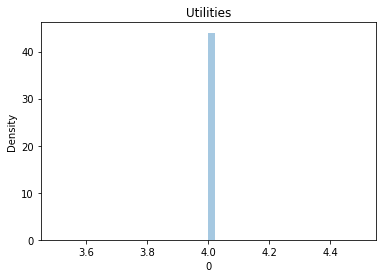

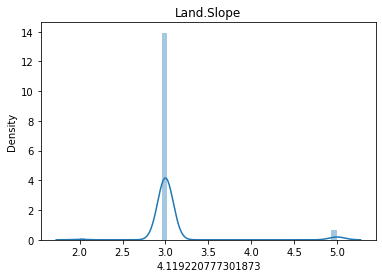

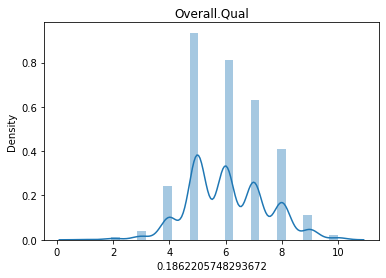

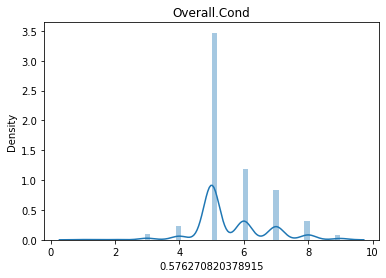

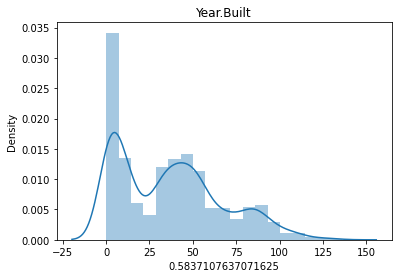

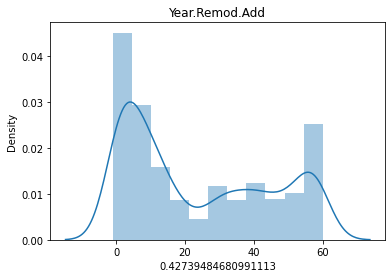

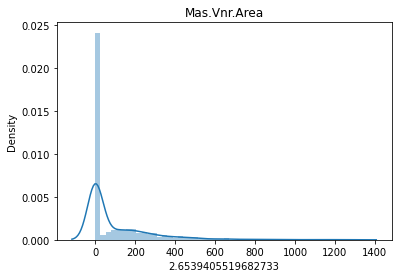

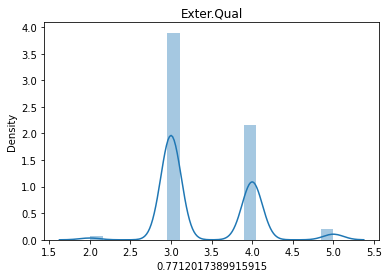

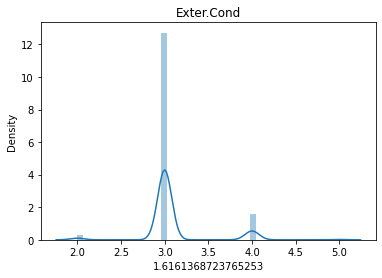

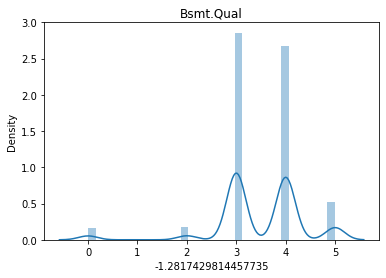

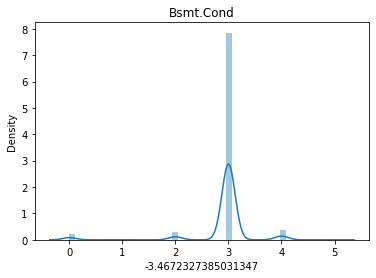

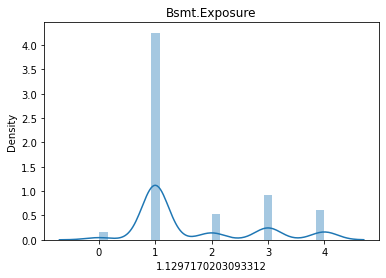

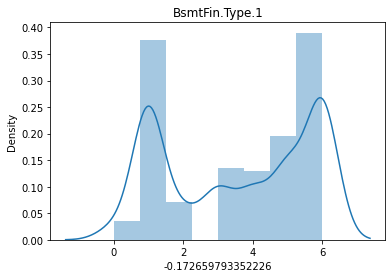

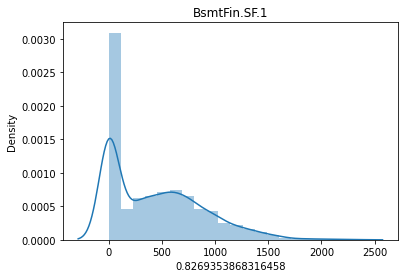

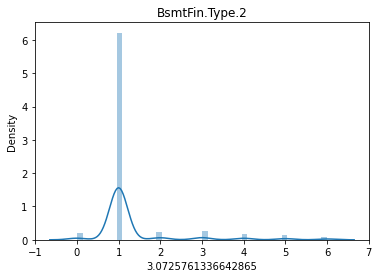

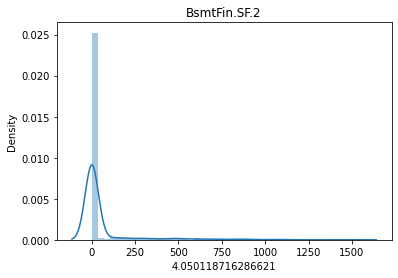

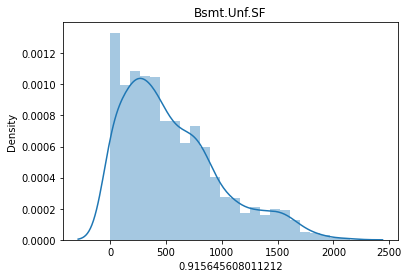

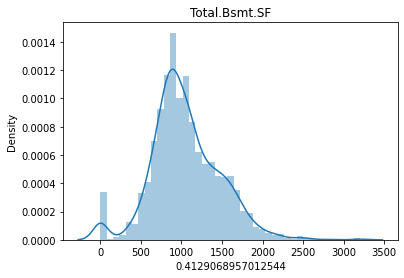

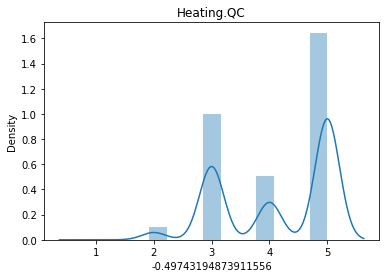

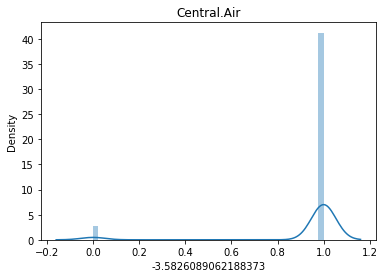

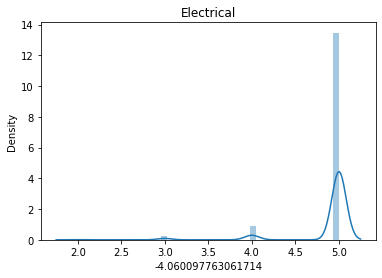

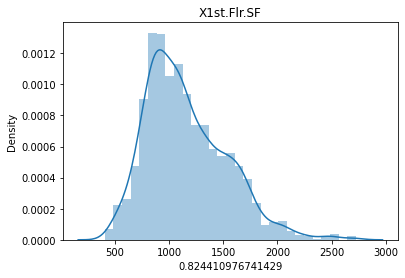

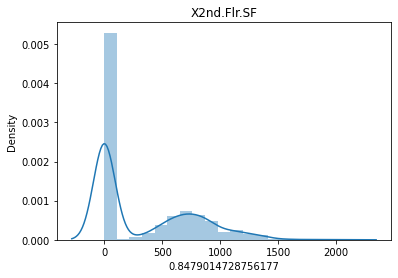

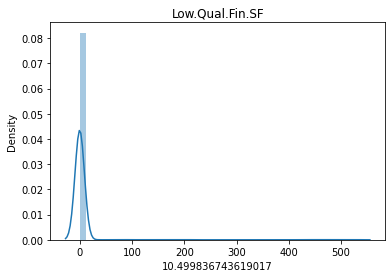

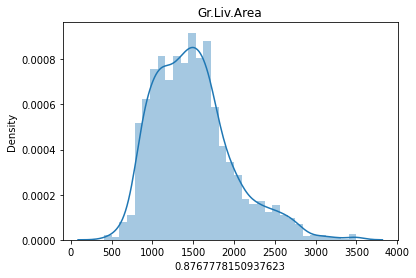

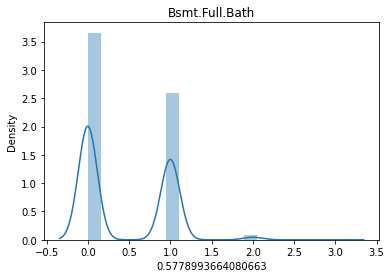

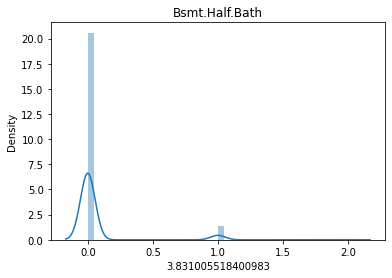

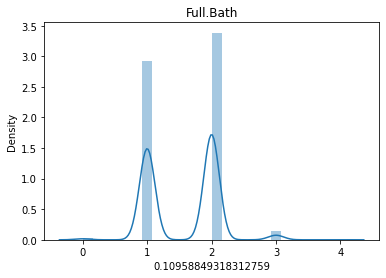

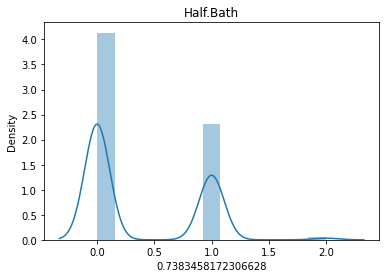

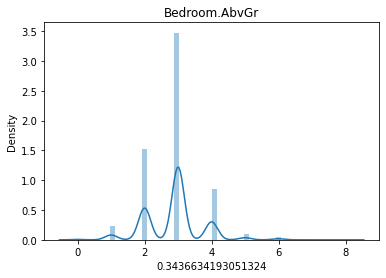

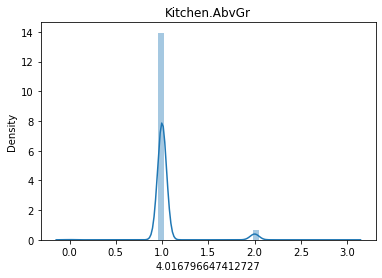

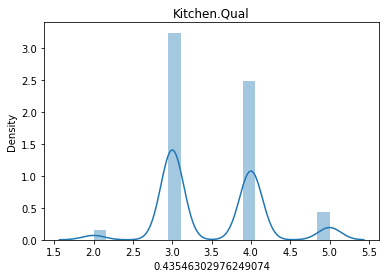

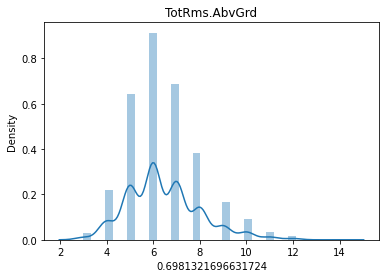

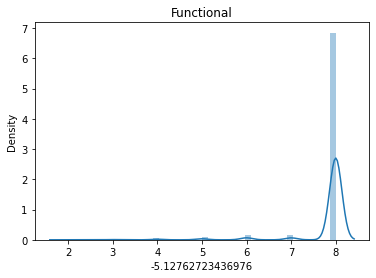

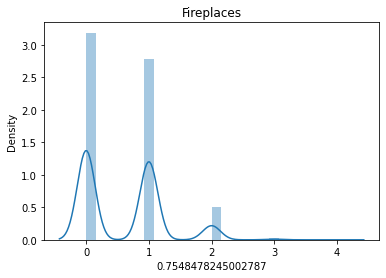

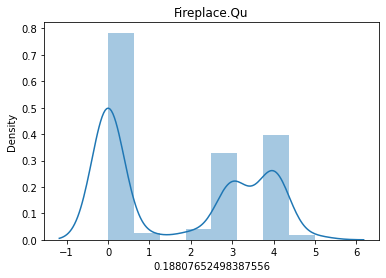

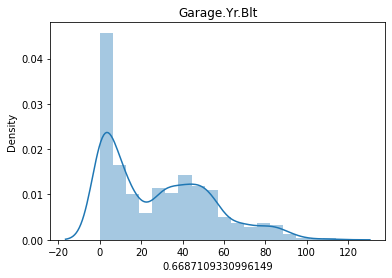

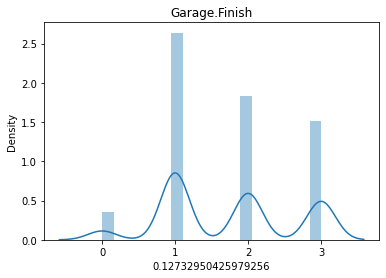

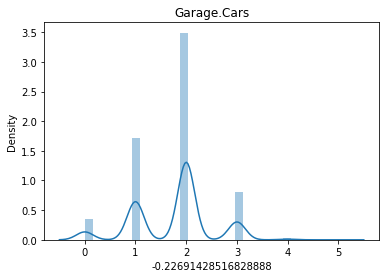

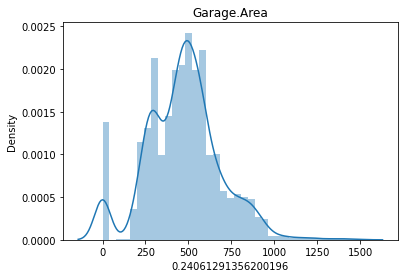

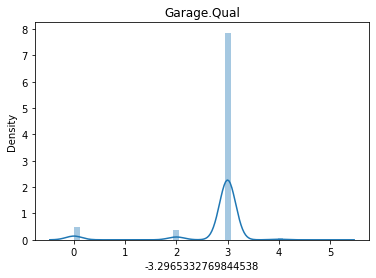

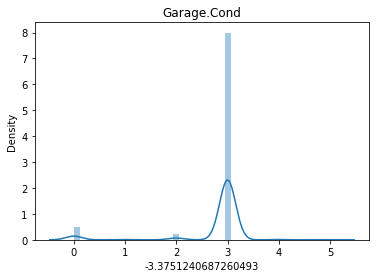

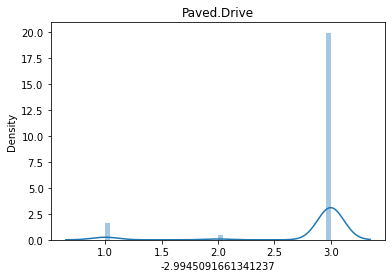

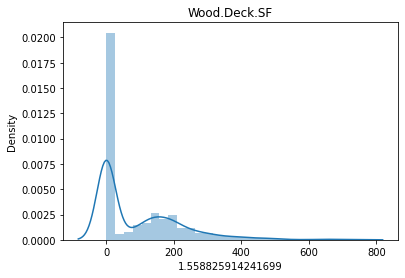

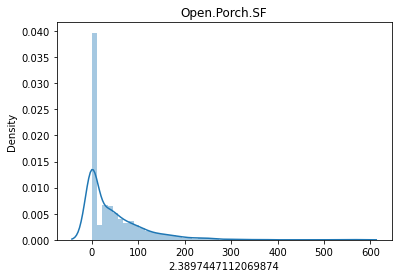

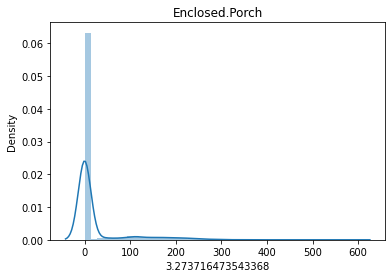

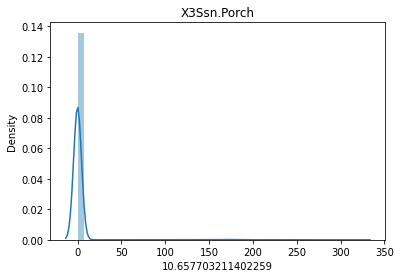

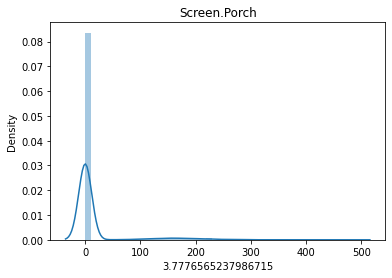

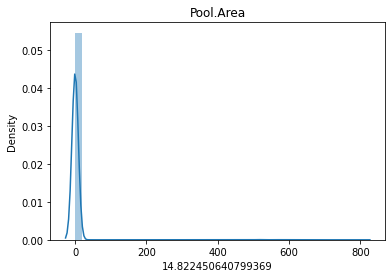

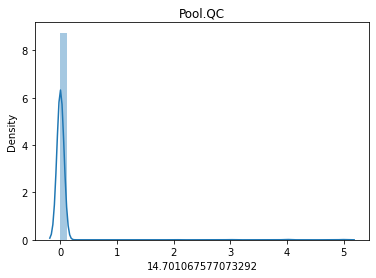

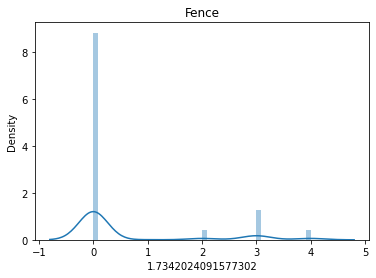

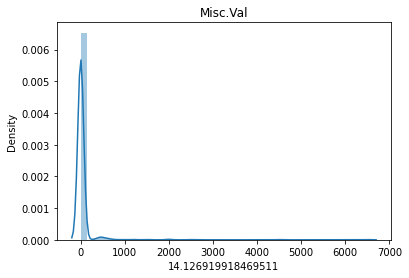

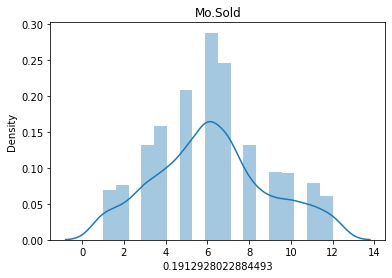

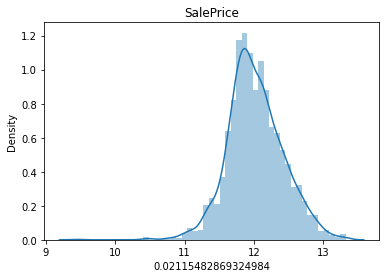

In [115]:
#wykres gęstości wraz ze skośnością dla każdej zmiennej
for zmienna in zmienne_numeryczne:
    sns.distplot(data[zmienna])
    plt.title(zmienna)
    plt.xlabel(data[zmienna].skew())
    plt.show()

In [116]:
#sprawdzenie skośności zmiennych i ich logarytmów (zmienna +1, bo nie ma log(0))
for zmienna in zmienne_numeryczne:
    print(zmienna, data[zmienna].skew(), np.log(data[zmienna]+1).skew())

MS.SubClass 1.3974458936833827 0.25868456630202874
Lot.Frontage -0.21205850582073738 -1.6396514698940539
Lot.Area 4.316676704346977 -0.6216435428242992
Street -15.72815999138607 -15.728159991386068
Lot.Shape -1.3135216509088916 -2.0181234964969996
Utilities 0 0
Land.Slope 4.119220777301873 3.6913183168269574
Overall.Qual 0.1862205748293672 -0.5959672366162427
Overall.Cond 0.576270820378915 -0.7366125730863665
Year.Built 0.5837107637071625 -0.8598387792362239
Year.Remod.Add 0.42739484680991113 nan
Mas.Vnr.Area 2.6539405519682733 0.5782513399116334
Exter.Qual 0.7712017389915915 0.4991236837982567
Exter.Cond 1.6161368723765253 0.8752824586200267
Bsmt.Qual -1.2817429814457735 -3.556390971958072
Bsmt.Cond -3.4672327385031347 -5.022848017785462
Bsmt.Exposure 1.1297170203093312 0.5835366084112505
BsmtFin.Type.1 -0.172659793352226 -0.5803510561240465
BsmtFin.SF.1 0.8269353868316458 -0.6577501992200679
BsmtFin.Type.2 3.0725761336642865 1.8606579258261526
BsmtFin.SF.2 4.050118716286621 2.3562933

In [117]:
# w przypadku niektórych zmiennych logarytm znacząco zmniejsza ich skośność - zasotaną naspisane swoim logarytem
def na_log(zmienna):
    data[zmienna] = np.log(data[zmienna]+1)

In [118]:
na_log('X1st.Flr.SF')
na_log('Open.Porch.SF')
na_log('Gr.Liv.Area')
na_log('TotRms.AbvGrd')
na_log('Wood.Deck.SF')
na_log('Garage.Yr.Blt')
na_log('Lot.Area')
na_log('Kitchen.Qual')
na_log('MS.SubClass')
na_log('Mas.Vnr.Area')
na_log('Fireplace.Qu')
na_log('Fireplaces')
na_log('Misc.Val')
na_log('X2nd.Flr.SF')
na_log('Bsmt.Exposure')
na_log('Exter.Cond')
na_log('BsmtFin.SF.2')
na_log('Enclosed.Porch')

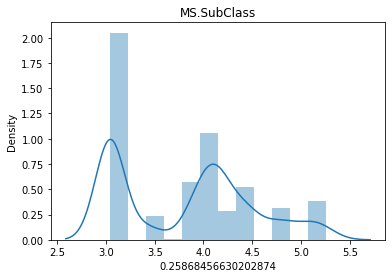

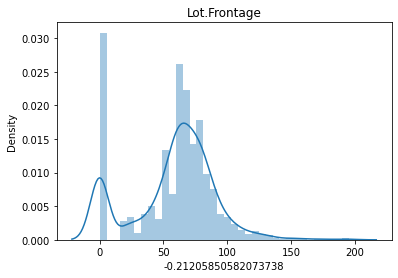

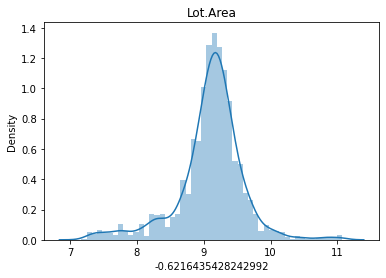

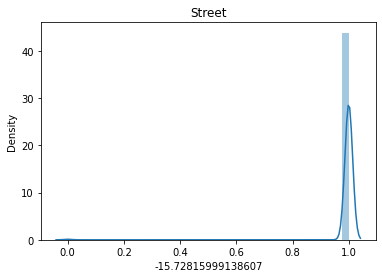

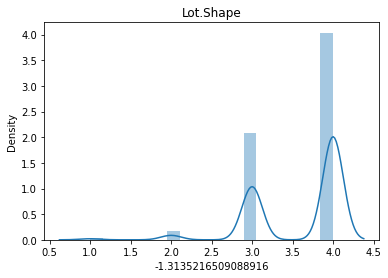

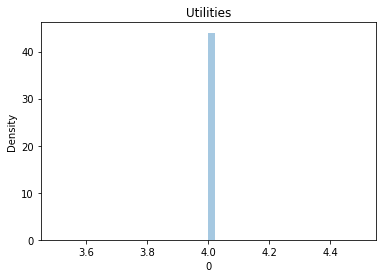

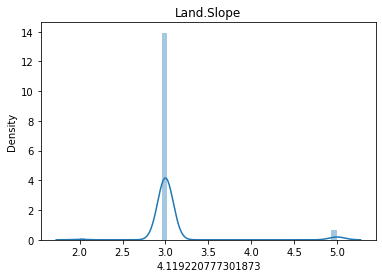

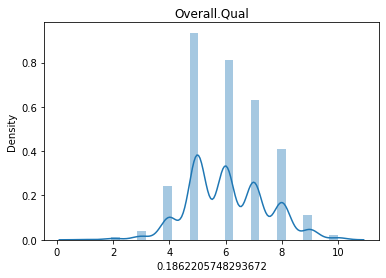

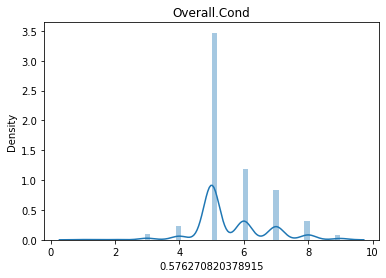

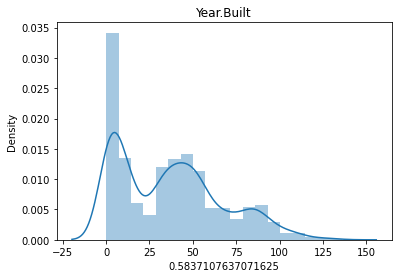

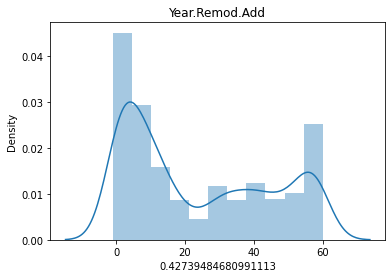

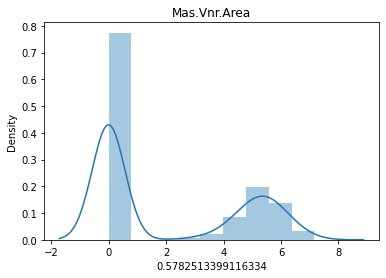

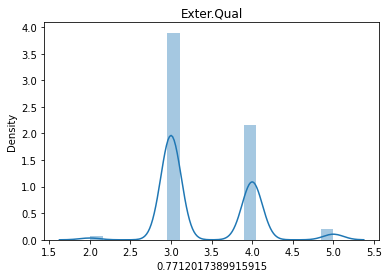

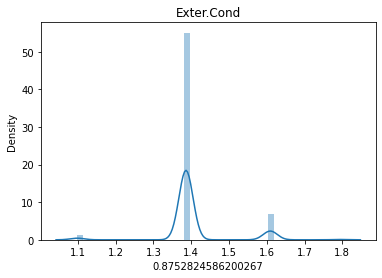

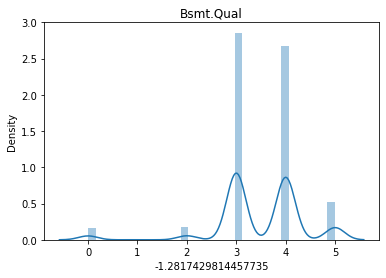

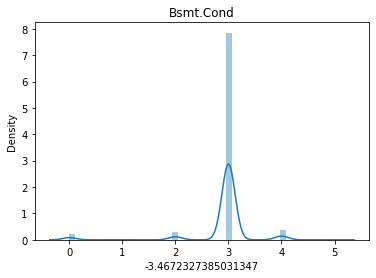

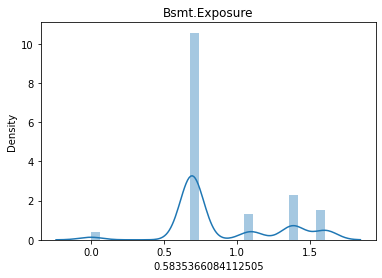

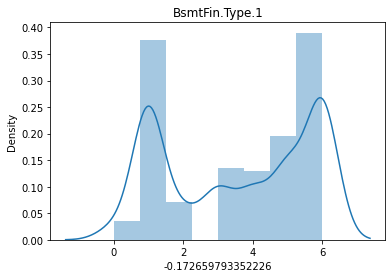

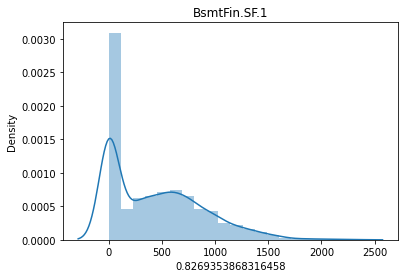

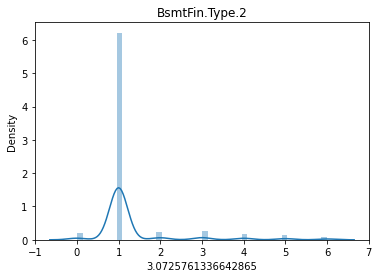

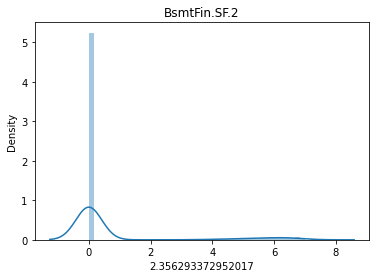

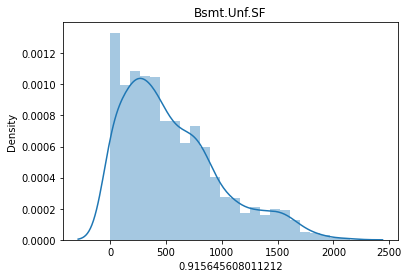

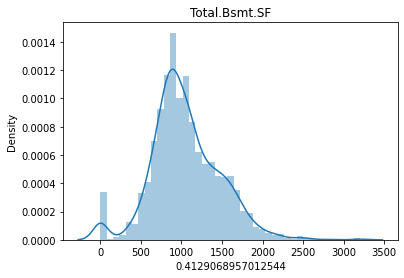

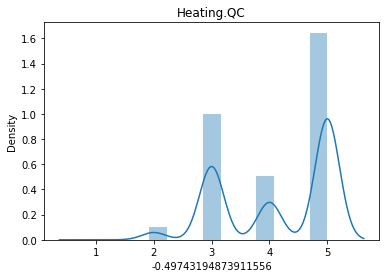

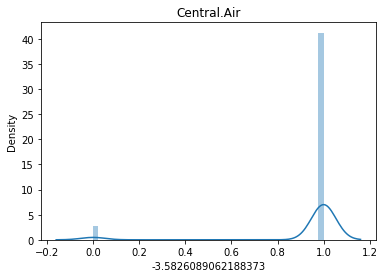

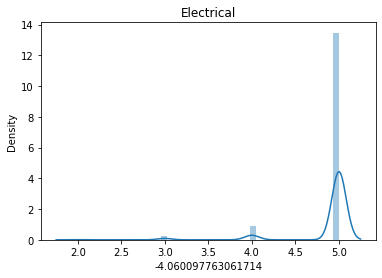

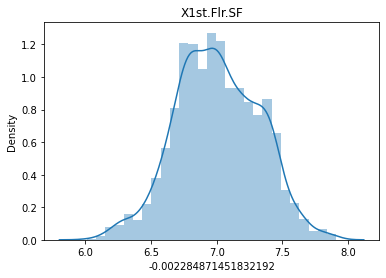

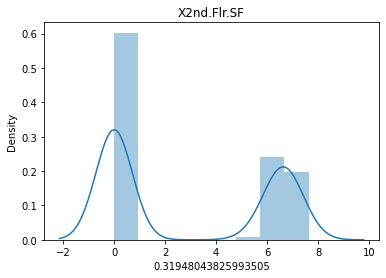

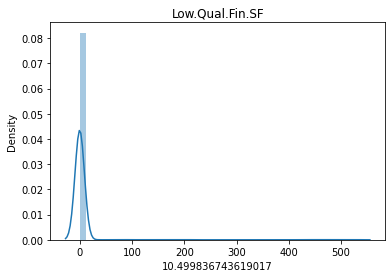

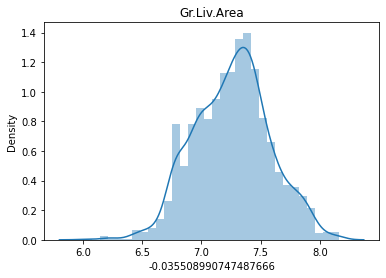

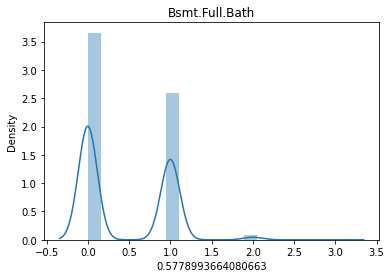

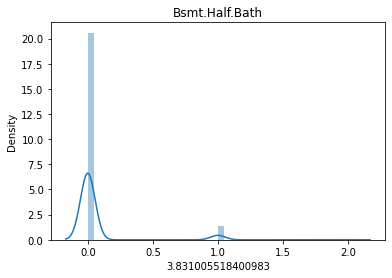

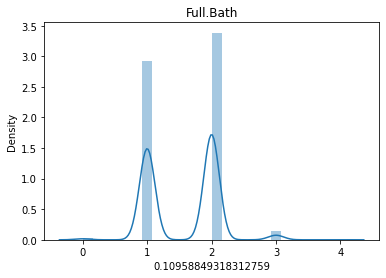

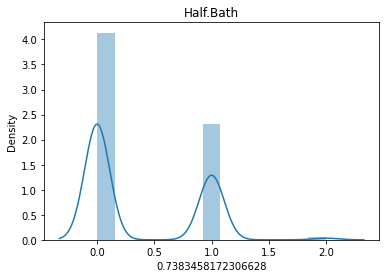

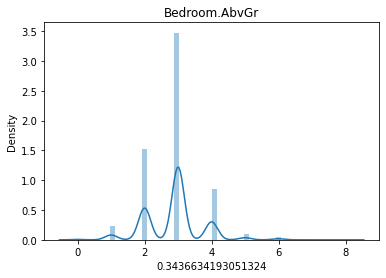

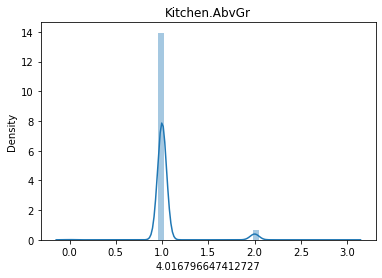

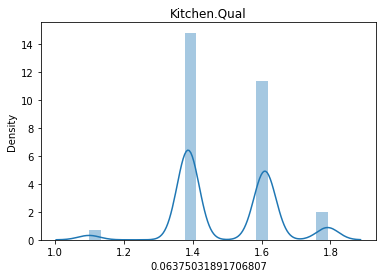

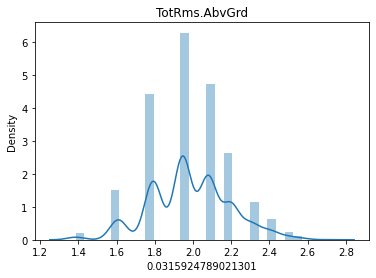

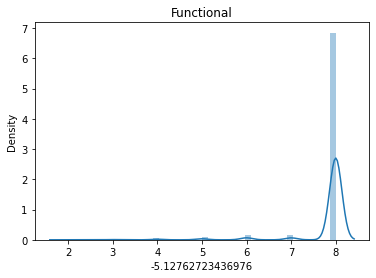

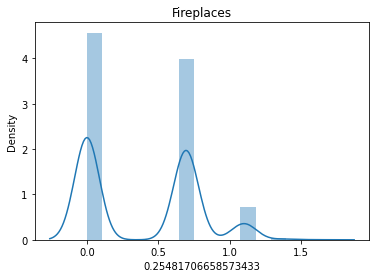

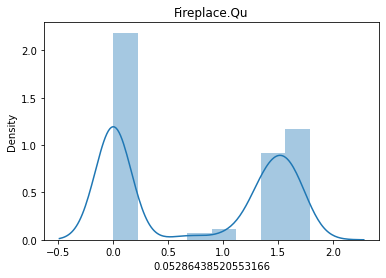

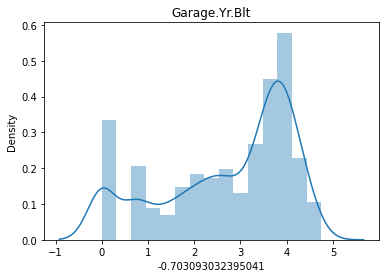

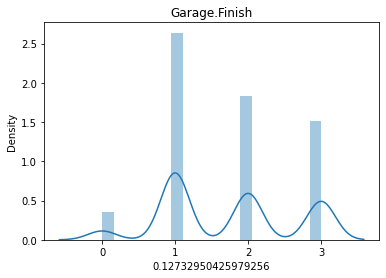

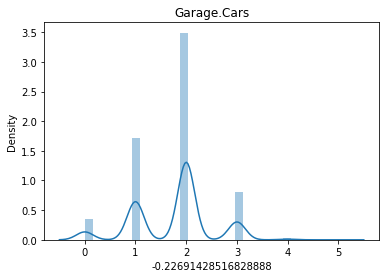

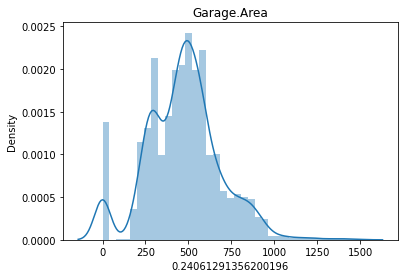

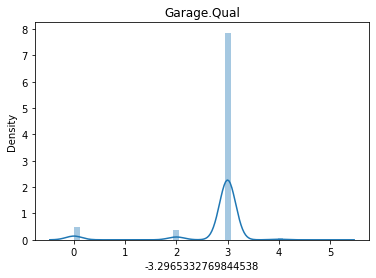

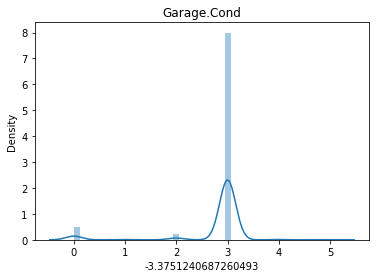

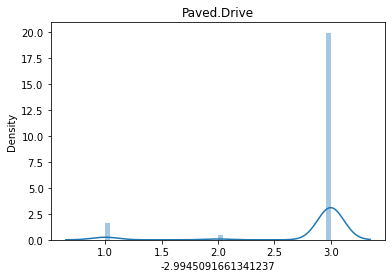

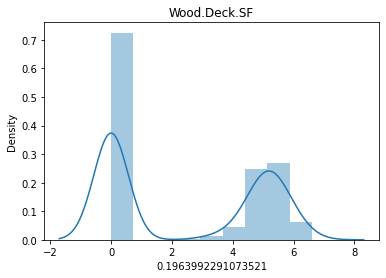

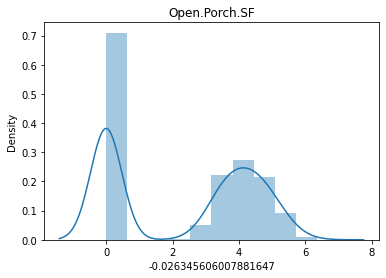

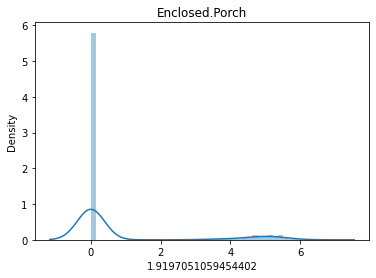

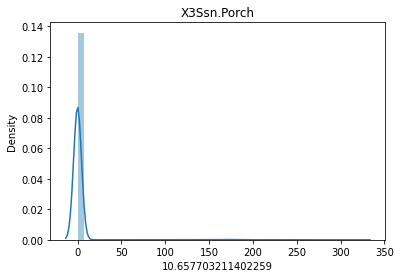

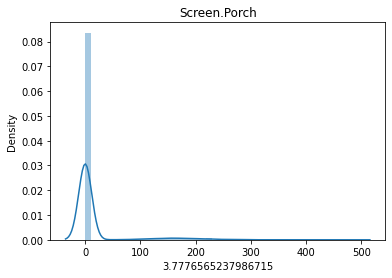

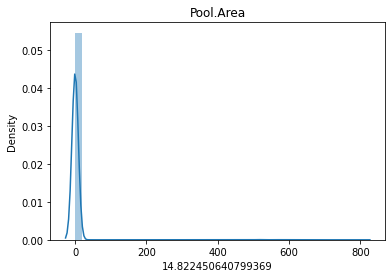

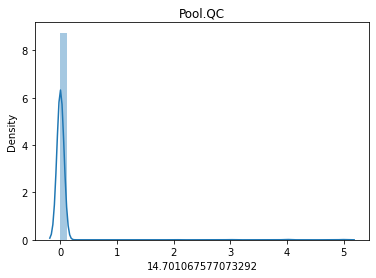

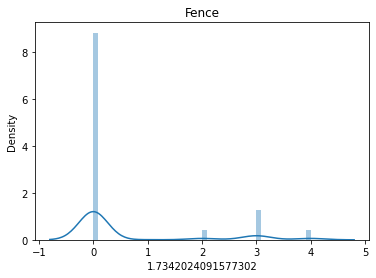

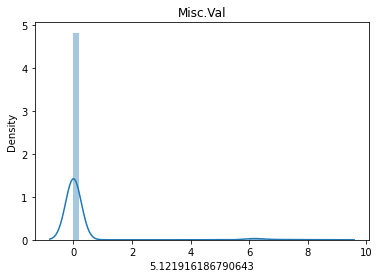

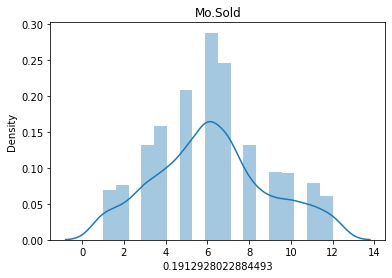

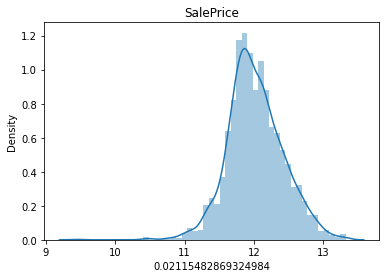

In [119]:
#sprawdzenie gęstości i skośności po zmianie
for zmienna in zmienne_numeryczne:
    sns.distplot(data[zmienna])
    plt.title(zmienna)
    plt.xlabel(data[zmienna].skew())
    plt.show()

## Zmienna celu, zbiór trenigowy i testowy

In [120]:
#podział zbioru data na zmienną objaśnianą i zmienne objaśniające
y = data['SalePrice']
X = data
X.drop('SalePrice', axis=1, inplace=True)

In [121]:
#ustalenie ziatna losowości
seed = 42 

In [122]:
#podział zbioru na testowy i treningowy
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    random_state=seed,
                                                    test_size=0.3)

In [123]:
y_test.shape

(600,)

## Modelowanie

In [124]:
#wyznaczenie kfold
kfold = model_selection.KFold(n_splits=5,
                              random_state=seed)

In [125]:
#model1 - ElasticNet
grid_1 = GridSearchCV(make_pipeline(PolynomialFeatures(degree=2),
                                    ElasticNet()),
                    param_grid={'polynomialfeatures__degree': [1,2],
                    'elasticnet__alpha': [0.01, 0.1, 1]},
                    cv=kfold,
                    refit=True)
grid_1.fit(X_train, y_train)
grid_1.best_params_

{'elasticnet__alpha': 0.01, 'polynomialfeatures__degree': 1}

In [126]:
#model2 - Lasso
grid_2 = GridSearchCV(make_pipeline(PolynomialFeatures(degree=2),
                                    Lasso(alpha=1)),
                    param_grid={'polynomialfeatures__degree': [1,2],
                    'lasso__alpha': [0.01, 0.1, 1]},
                    cv=kfold,
                    refit=True)
grid_2.fit(X_train, y_train)
grid_2.best_params_

{'lasso__alpha': 0.01, 'polynomialfeatures__degree': 1}

In [127]:
#model3 - Ridge
grid_3 = GridSearchCV(make_pipeline(PolynomialFeatures(degree=2),
                                    linear_model.Ridge(alpha=1)),
                    param_grid={'polynomialfeatures__degree': [1, 2],
                    'ridge__alpha': [0.01, 0.1, 1]},                      
                    cv=kfold,
                    refit=True)
grid_3.fit(X_train, y_train)
grid_3.best_params_

{'polynomialfeatures__degree': 1, 'ridge__alpha': 1}

In [128]:
#model4 - Regresja liniowa
grid_4 = GridSearchCV(make_pipeline(PolynomialFeatures(degree=2),
                                    linear_model.LinearRegression()),
                    param_grid={'polynomialfeatures__degree': [1, 2]},                      
                    cv=kfold,
                    refit=True)
grid_4.fit(X_train, y_train)
grid_4.best_params_

{'polynomialfeatures__degree': 2}

In [129]:
#model5 - SVR
grid_5 = GridSearchCV(SVR(kernel='rbf', gamma=0.1),
                    param_grid={"C": [10, 100, 150], 
                                "gamma": [0.01, 0.1, 1]},
                    cv=kfold,
                    refit=True)
grid_5.fit(X_train, y_train)
grid_5.best_params_

{'C': 10, 'gamma': 0.01}

In [130]:
#model 6 Las losowy
param_grid = {
    'n_estimators': [20, 50, 100, 200],
    'max_depth':  [50, 100, 150],
    'max_features': ['auto', 'sqrt', 'log2']    
}

rfc = RandomForestRegressor(n_jobs = -1,
                            max_features = 'sqrt',
                            n_estimators= 50, 
                            oob_score = True) 

grid_6 = GridSearchCV(estimator=rfc, 
                      param_grid=param_grid, 
                      cv= kfold)
grid_6.fit(X_train, y_train)
grid_6.best_params_

{'max_depth': 50, 'max_features': 'sqrt', 'n_estimators': 200}

In [131]:
#podsumowanie na danych testowych
models = []
models.append(('ElasticNet', grid_1.best_estimator_))
models.append(('Lasso', grid_2.best_estimator_))
models.append(('Ridge', grid_3.best_estimator_))
models.append(('LR', grid_4.best_estimator_))
models.append(('SVR', grid_5.best_estimator_))
models.append(('RF', grid_6.best_estimator_))

r2 = []
explained_variance_score = []
median_absolute_error = []
mean_squared_error = []
mean_absolute_error = []
for name, model in models:
    print(name)
    print("R^2: {}".format(metrics.r2_score(y_test, model.predict(X_test)) ))
    print("Explained variance score: {}".format( metrics.explained_variance_score(y_test, model.predict(X_test)) ))
    print("Median absolute error: {}".format( metrics.median_absolute_error(y_test, model.predict(X_test)) ))
    print("Mean squared error: {}".format( metrics.mean_squared_error(y_test, model.predict(X_test)) ))
    print("Mean absolute errors: {}".format(metrics.mean_absolute_error(y_test, model.predict(X_test)) ))
    r2.append(metrics.r2_score(y_test, model.predict(X_test)))
    explained_variance_score.append(metrics.explained_variance_score(y_test, model.predict(X_test)))
    median_absolute_error.append( metrics.median_absolute_error(y_test, model.predict(X_test)))
    mean_squared_error.append(metrics.mean_squared_error(y_test, model.predict(X_test)))
    mean_absolute_error.append(metrics.mean_absolute_error(y_test, model.predict(X_test)))

ElasticNet
R^2: 0.8811926433668493
Explained variance score: 0.8816802190667937
Median absolute error: 0.06494469028657956
Mean squared error: 0.01982441046443117
Mean absolute errors: 0.09189449036503224
Lasso
R^2: 0.8600536235513974
Explained variance score: 0.860688797406944
Median absolute error: 0.06794083876270385
Mean squared error: 0.02335170555383587
Mean absolute errors: 0.0998182609283554
Ridge
R^2: 0.9085076043965364
Explained variance score: 0.9090793954700911
Median absolute error: 0.05955694841329162
Mean squared error: 0.015266586651007795
Mean absolute errors: 0.08135741048460322
LR
R^2: -0.4717980046273753
Explained variance score: -0.4601523282363633
Median absolute error: 0.17081706983779021
Mean squared error: 0.24558687770957865
Mean absolute errors: 0.30532610139887795
SVR
R^2: 0.007721441764432124
Explained variance score: 0.012696224404033729
Median absolute error: 0.25163360964391757
Mean squared error: 0.1655733953769914
Mean absolute errors: 0.31645752079126

In [132]:
#podsumowanie w tabeli
d = {'R2': r2, 
     'explained_variance_score': explained_variance_score, 
     'median_absolute_error': median_absolute_error,
     'mean_squared_error' : mean_squared_error,
     'mean_absolute_error' : mean_absolute_error,
    }
df = pd.DataFrame(data=d)
df.insert(loc=0, column='Method', value=['ElasticNet','Lasso','Ridge','LR','SVR', 'RF'])
df

,Method,R2,explained_variance_score,median_absolute_error,mean_squared_error,mean_absolute_error
0,ElasticNet,0.881193,0.881680,0.064945,0.019824,0.091894
1,Lasso,0.860054,0.860689,0.067941,0.023352,0.099818
2,Ridge,0.908508,0.909079,0.059557,0.015267,0.081357
3,LR,-0.471798,-0.460152,0.170817,0.245587,0.305326
4,SVR,0.007721,0.012696,0.251634,0.165573,0.316458
5,RF,0.887392,0.887743,0.063164,0.018790,0.093064


Najlepszym modelem okazał się Ridge, niewiele gorszymi metodami są Las losowy, ElasticNet i Lasso co może sugerować, że dla tego problemu lepiej używać bardziej zaawansowane metody.

Poniżej została zaprezentowana predykcja przy użyciu metody Ridge wraz z realną ceną każdej z nieruchomości

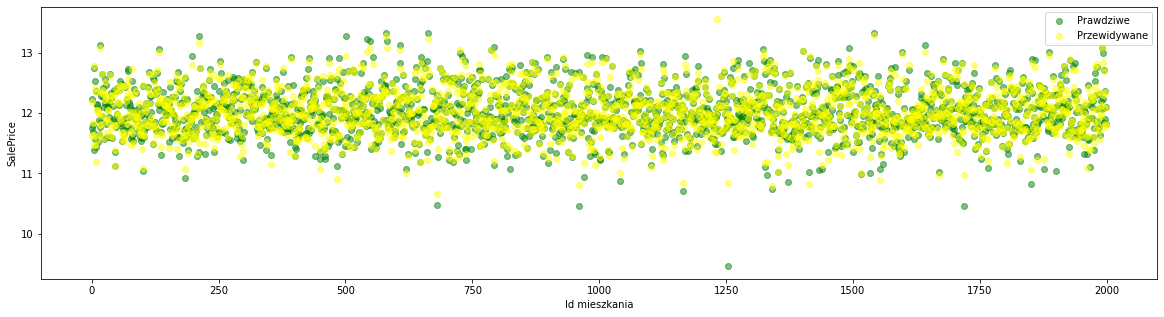

In [133]:
# sprawdzenie: logarytm z realne ceny vs. przewidywane

plt.figure(figsize=(20, 5))
plt.scatter(x = range(0, len(y)),
            y = y,
           alpha=0.5,
           c = 'green',
           label = 'Prawdziwe')
plt.scatter(x = range(0, len(y)),
            y = grid_3.best_estimator_.predict(X),
           alpha=0.5,
           c = 'yellow',
           label = 'Przewidywane')

plt.ylabel('SalePrice')
plt.xlabel('Id mieszkania')
plt.legend()
plt.show()

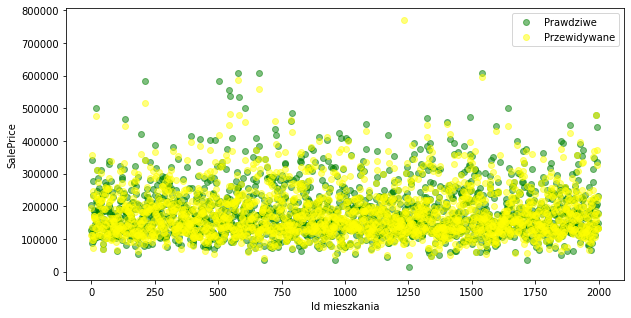

In [134]:
# sprawdzenie: realne ceny (bez logarytmu) vs. przewidywane

plt.figure(figsize=(10, 5))
plt.scatter(x = range(0, len(y)),
            y = np.e**y,
           alpha=0.5,
           c = 'green',
           label = 'Prawdziwe')
plt.scatter(x = range(0, len(y)),
            y = np.e**grid_3.best_estimator_.predict(X),
           alpha=0.5,
           c = 'yellow',
           label = 'Przewidywane')

plt.ylabel('SalePrice')
plt.xlabel('Id mieszkania')
plt.legend()
plt.show()